# Loading libraries

In [1]:
#Bread and butter
import pandas as pd
import numpy as np
from scipy import stats
import os
import io
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

In [2]:
# FE / ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, f_regression, mutual_info_classif,mutual_info_regression
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, ElasticNet

In [5]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # If there are GPUs available, print a message and enable memory growth
  print("GPU is available")
  for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    print(tf.config.list_physical_devices('GPU'))
else:
  print("GPU is not available")

GPU is available
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Data loading

In [ ]:
 # Loading the data
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1mOPZf3mgvffzIVzGRle25vrFHr16RU_H'}) 
downloaded.GetContentFile('X_contd.csv')
data = pd.read_csv('X_contd.csv')
data.head()

,Unnamed: 0,heathrate_min,heathrate_max,blood_pressure_min,blood_pressure_max,mean_art.bloodpressure_min,mean_art.bloodpressure_max,temp_min,temp_max,breathing_rate_min,...,thrombocit_min,total_daily_dose(mg),contd_inf_rate(mL/h),pip_dosage(mg),sample_conc(mg/L),pip_dosage(mg).1,new_dosage(mL/h),Age,Height,Weight
0,0,52.5,114.5,63.0,121.0,55.0,84.5,33.4,37.6,15.0,...,270.0,1200.0,6.3,10940.0,152.2,13500.00,4.5,75,170.0,60.0
1,1,56.0,110.0,63.0,121.0,64.0,81.0,35.4,38.5,14.0,...,274.0,1800.0,6.3,10940.0,152.2,13500.00,4.5,75,170.0,60.0
2,2,56.0,86.0,63.0,121.0,69.0,86.0,35.7,37.0,6.0,...,265.0,400.0,6.3,10940.0,127.8,10300.00,4.0,75,170.0,60.0
3,3,46.0,94.0,63.0,121.0,59.0,81.0,36.5,38.3,6.0,...,225.0,400.0,6.3,10940.0,96.3,8.64,4.0,75,170.0,60.0
4,4,40.0,115.0,63.0,121.0,63.0,95.0,34.5,37.1,8.0,...,291.0,400.0,6.3,10940.0,76.5,3890.00,1.0,75,170.0,60.0


In [ ]:
data = data.drop(['Unnamed: 0','urine_collection(h)'],axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2386 entries, 0 to 2385
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   heathrate_min               2386 non-null   float64
 1   heathrate_max               2386 non-null   float64
 2   blood_pressure_min          2386 non-null   float64
 3   blood_pressure_max          2386 non-null   float64
 4   mean_art.bloodpressure_min  2386 non-null   float64
 5   mean_art.bloodpressure_max  2386 non-null   float64
 6   temp_min                    2386 non-null   float64
 7   temp_max                    2386 non-null   float64
 8   breathing_rate_min          2386 non-null   float64
 9   breathing_rate_max          2386 non-null   float64
 10  bicarbonate_min             2386 non-null   float64
 11  bicarbonate_max             2386 non-null   float64
 12  ph_min                      2386 non-null   float64
 13  ph_max                      2386 

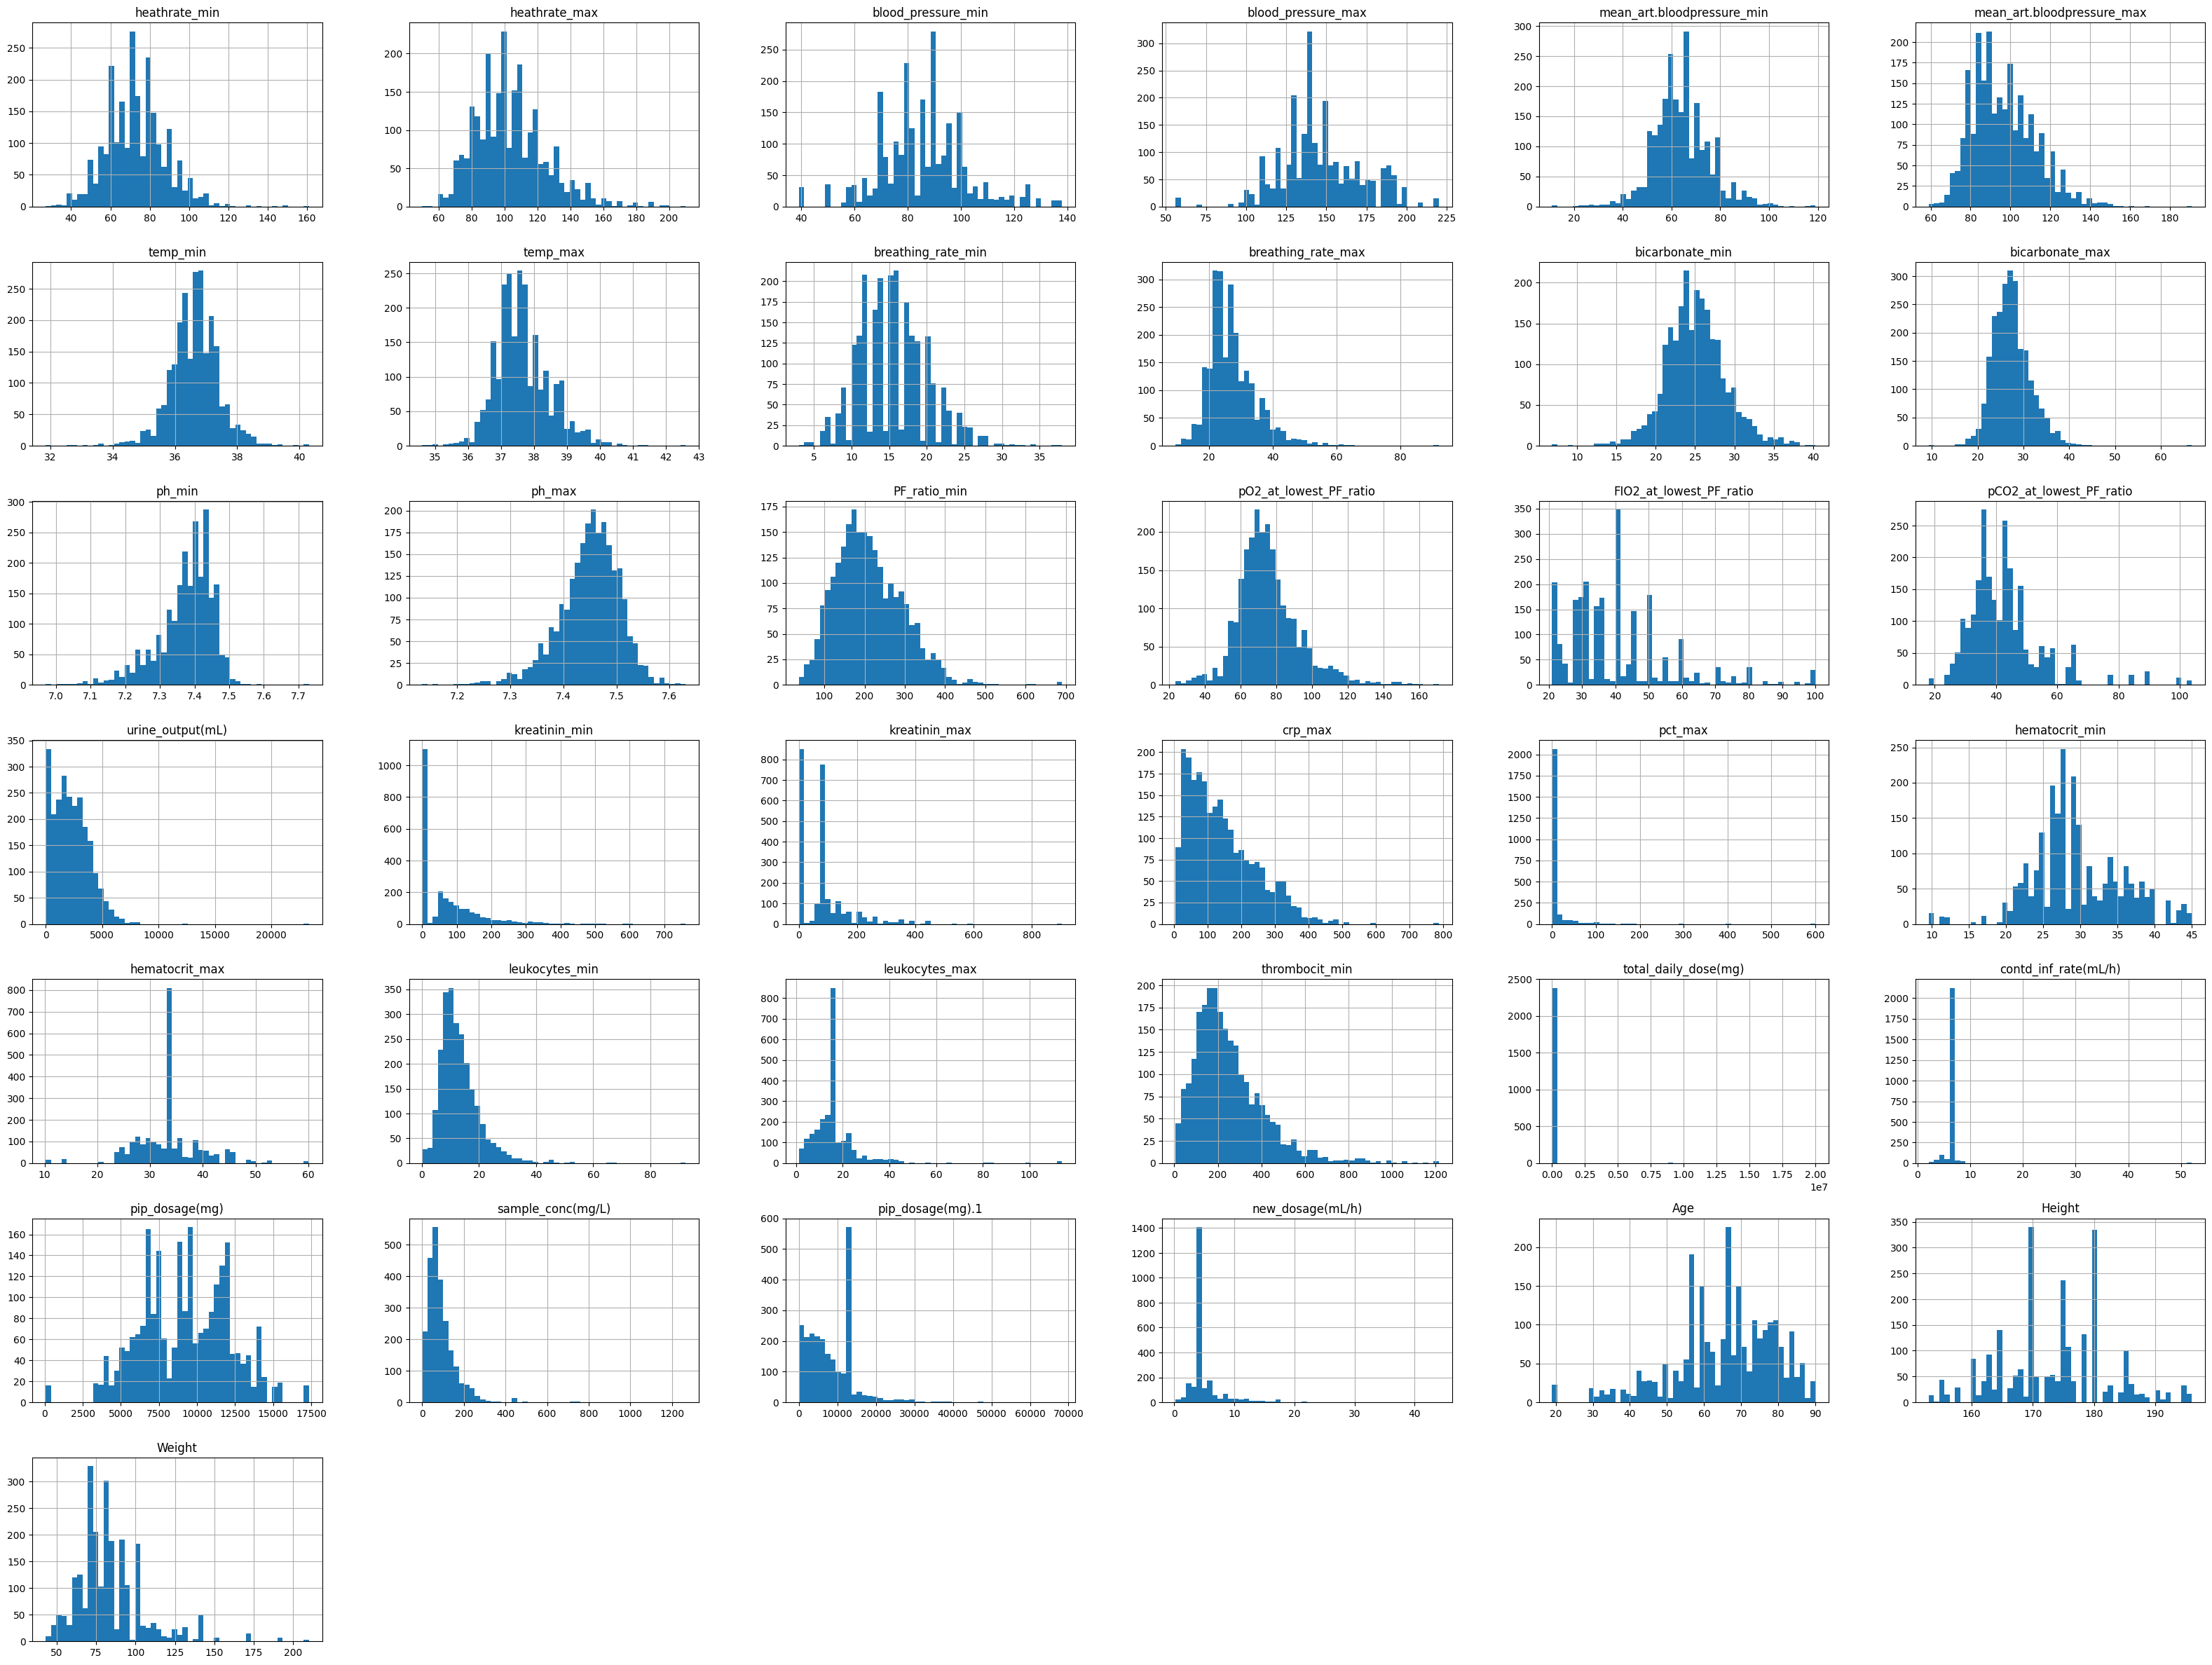

In [ ]:
data.hist(bins=50, figsize=(40,30))
plt.show()

In [ ]:
data.describe()

,heathrate_min,heathrate_max,blood_pressure_min,blood_pressure_max,mean_art.bloodpressure_min,mean_art.bloodpressure_max,temp_min,temp_max,breathing_rate_min,breathing_rate_max,...,thrombocit_min,total_daily_dose(mg),contd_inf_rate(mL/h),pip_dosage(mg),sample_conc(mg/L),pip_dosage(mg).1,new_dosage(mL/h),Age,Height,Weight
count,2386.000000,2386.000000,2386.000000,2386.00000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,...,2386.000000,2.386000e+03,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000
mean,73.086337,103.593462,85.633487,146.16450,64.128705,96.611557,36.630889,37.642410,15.521451,27.100075,...,249.518755,4.106581e+04,6.302184,9226.800729,92.114199,8572.964779,5.280780,65.598910,173.480385,83.334325
std,14.988028,21.701380,16.439728,25.31997,11.549324,15.690796,0.764588,0.816509,4.590862,7.502137,...,161.883739,6.603671e+05,2.749943,2924.363147,75.628224,6653.706765,3.010163,13.473651,8.653700,21.588435
min,27.000000,50.000000,39.000000,56.00000,11.000000,59.000000,31.850000,34.600000,3.000000,9.400000,...,5.000000,1.000000e+00,2.100000,56.620000,0.000000,0.000000,0.200000,19.000000,153.000000,43.000000
25%,62.000000,89.125000,75.500000,130.00000,57.000000,85.000000,36.200000,37.100000,12.000000,22.000000,...,138.000000,1.200000e+03,6.300000,6815.000000,45.500000,3402.000000,4.500000,57.000000,168.000000,70.000000
50%,72.000000,100.000000,85.000000,142.00000,63.000000,95.000000,36.600000,37.500000,15.000000,26.000000,...,215.000000,3.000000e+03,6.300000,9319.500000,74.600000,7390.000000,4.500000,67.000000,175.000000,80.000000
75%,82.000000,116.000000,95.000000,163.00000,70.000000,106.500000,37.100000,38.100000,18.000000,31.000000,...,325.000000,4.079035e+04,6.300000,11569.500000,119.700000,13600.000000,5.000000,76.000000,180.000000,92.000000
max,161.000000,210.000000,138.000000,220.00000,119.000000,191.000000,40.300000,42.600000,38.000000,92.000000,...,1215.000000,2.000000e+07,52.100000,17350.000000,1264.890000,68355.000000,44.000000,90.000000,196.000000,210.000000


In [ ]:
data.nunique()

heathrate_min                  140
heathrate_max                  187
blood_pressure_min              69
blood_pressure_max              86
mean_art.bloodpressure_min     195
mean_art.bloodpressure_max     215
temp_min                       103
temp_max                       101
breathing_rate_min             104
breathing_rate_max             134
bicarbonate_min                217
bicarbonate_max                213
ph_min                         293
ph_max                         239
PF_ratio_min                   934
pO2_at_lowest_PF_ratio         750
FIO2_at_lowest_PF_ratio        129
pCO2_at_lowest_PF_ratio        164
urine_output(mL)               918
kreatinin_min                  641
kreatinin_max                  308
crp_max                       1395
pct_max                        830
hematocrit_min                  99
hematocrit_max                  83
leukocytes_min                 742
leukocytes_max                 491
thrombocit_min                 671
total_daily_dose(mg)

## Loading scores

In [ ]:
downloaded_2 = drive.CreateFile({'id':'1VN74lHinrprA_sdZPFF1PhNnBp430hq5'}) 
downloaded_2.GetContentFile('sofa.csv')
data_sofa = pd.read_csv('sofa.csv')
data_sofa.head()

,Unnamed: 0,Sofa
0,0,6.0
1,1,7.0
2,2,6.0
3,3,6.0
4,4,7.0


In [ ]:
data_sofa = data_sofa.drop(['Unnamed: 0'],axis=1)

In [ ]:
data_sofa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2386 entries, 0 to 2385
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sofa    2386 non-null   float64
dtypes: float64(1)
memory usage: 18.8 KB


In [ ]:
data_sofa.describe()

,Sofa
count,2386.000000
mean,7.387678
std,3.782582
min,0.000000
25%,5.000000
50%,7.000000
75%,10.000000
max,23.000000


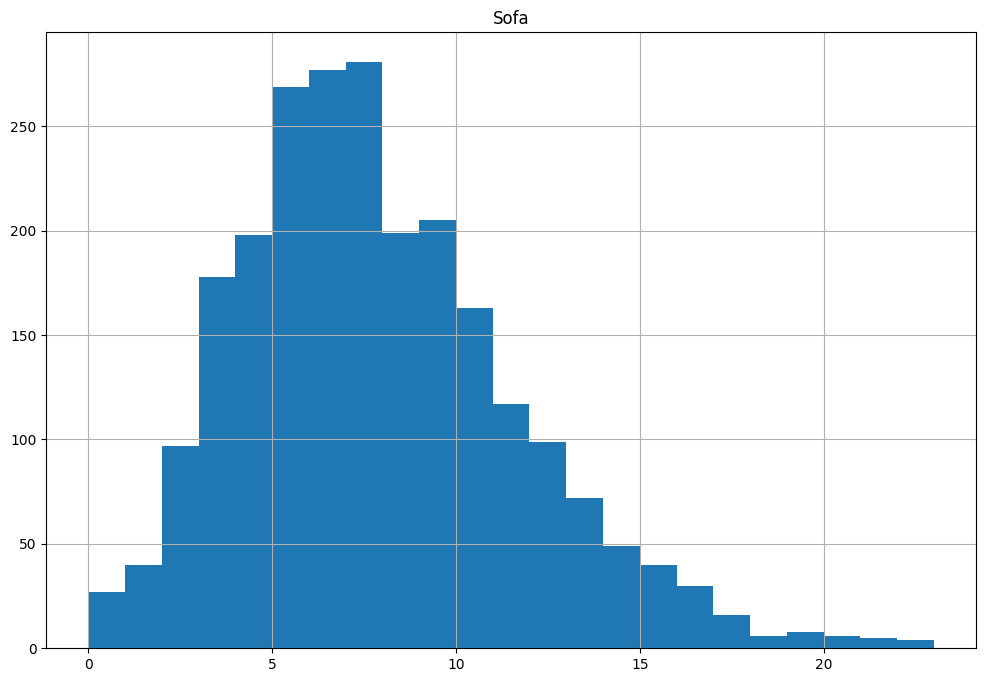

In [ ]:
data_sofa.hist(bins=23, figsize=(12,8))
plt.show()

In [ ]:
X_base = data
y_base = data_sofa['Sofa']
print(X_base.shape)

(2386, 37)


# Data Cleaning

## Single value features

In [ ]:
# Number of unique values for each column
counts = X_base.nunique()
# record columns to delete
to_delete = [i for i,v in enumerate(counts) if v == 1]
print(to_delete)

[]


In [ ]:
# drop useless columns
X_base.drop(to_delete, axis=1, inplace=True)
print(X_base.shape)

(2386, 37)


## Few Value Features

In general, some columns in the dataset can have very few unique values. For example, 1, 3, 5 unique values. This makes sense for ordinal or categorical variables. In our case, however, the dataset supposed to contains only **numerical** variables. Therefore columns with few unique variable is very surprising. Lets check out!

We had already counted the unique elements above (`counts`), so we can use it for checking the uniqueness of continuous features.

In [ ]:
for i in range(counts.shape[0]):
  percentage = float(counts[i]) / X_base.shape[0] * 100
  if percentage < 1:
    print('%s, %d, %.1f%%' % (counts.index[i], counts[i], percentage))

contd_inf_rate(mL/h), 21, 0.9%


In our case, it makes sense to include this feature as contd. variable. So, everything looks fine!

But if there was something to delete, how would we do that? Below is an example:

In [ ]:
# delete where unique value is less than x% of the rows:
#---------------------------------------------------------
#Initial state:
print(X_base.shape)
# get number of unique values for each column (repeated for the sake of completeness)
counts = X_base.nunique()
# record columns to delete
to_delete = [i for i,v in enumerate(counts) if (float(v)/X_base.shape[0]*100) < 0.8]
print(to_delete)
# drop useless columns
X_base.drop(to_delete, axis=1, inplace=True)
print(X_base.shape)

(2386, 37)
[]
(2386, 37)


## Low variance filtering

You may also want to filter the features based the variance in that particular column.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

>Threshold=0.00, Features=37
>Threshold=0.05, Features=35
>Threshold=0.10, Features=35
>Threshold=0.15, Features=35
>Threshold=0.20, Features=35
>Threshold=0.25, Features=35


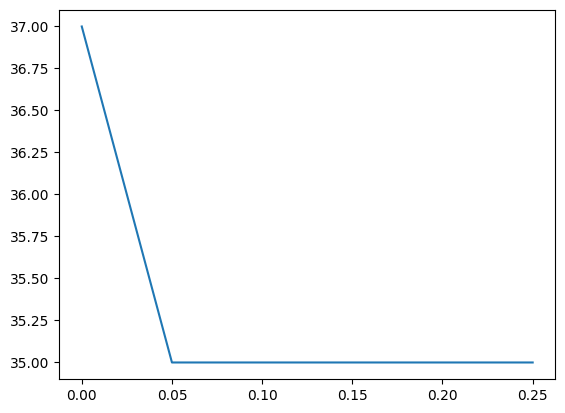

In [ ]:
# Assuming thresholds:
thresholds = np.arange(0.0, 0.30, 0.05)
# apply transform method for each threshold and append results:
results = list()
for t in thresholds:
  # define the transform
  transform = VarianceThreshold(threshold=t)
  # transform the input data
  X_sel = transform.fit_transform(X_base)
  # determine the number of input features
  n_features = X_sel.shape[1]
  print('>Threshold=%.2f, Features=%d' % (t, n_features))
  # store the result
  results.append(n_features)
  # plot the threshold vs the number of selected features
plt.plot(thresholds, results)
plt.show()

## Check for Duplicate Data

The Pandas function `duplicated()` will report whether a given row is duplicated or not: 

In [ ]:
data_base = X_base.assign(sofa_score = y_base)
data_base.shape

(2386, 38)

In [ ]:
# calculate duplicates
duplicates = data_base.duplicated()

In [ ]:
# report if there are any duplicates:
print(duplicates.any())

True


In [ ]:
data_base[duplicates].shape

(12, 38)

### Delete Rows That Contain Duplicate Data

In [ ]:
# Original dataframe:
print(data_base.shape)
# delete duplicate rows
data_base.drop_duplicates(inplace=True)
print(data_base.shape)

(2386, 38)
(2374, 38)


## Resplitting the labels and the features

In [ ]:
y_base = data_base['sofa_score'].squeeze()
X_base = data_base.drop(columns='sofa_score',axis=1)

In [ ]:
print(X_base.shape,y_base.shape)

(2374, 37) (2374,)


# Quantization example

<Axes: >

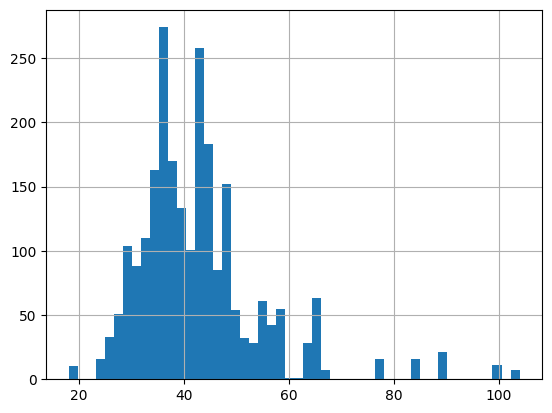

In [ ]:
X_base['pCO2_at_lowest_PF_ratio'].hist(bins=50)

<Axes: >

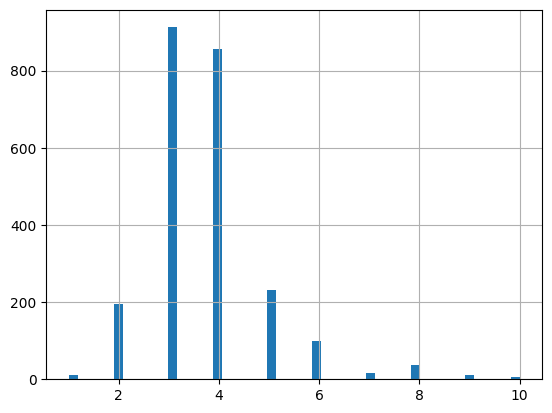

In [ ]:
#feature to play around: pCO2_at_lowest_PF_ratio
#------------------------------------------------
# dividing it to bins of 10:
quantized_pCO2_lowest_PF =np.floor_divide(X_base['pCO2_at_lowest_PF_ratio'], 10)
quantized_pCO2_lowest_PF.hist(bins=50)

<Axes: >

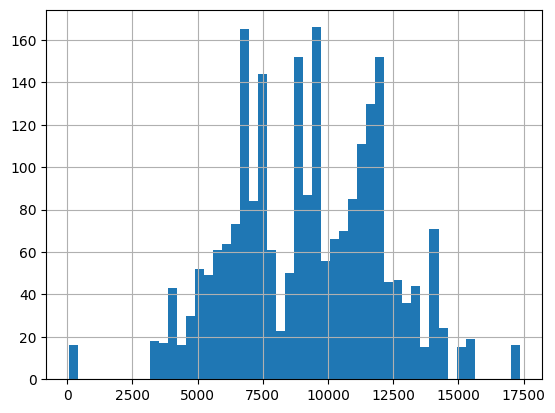

In [ ]:
# Map to exponential-width bins via the log function:
X_base['pip_dosage(mg)'].hist(bins=50)

<Axes: >

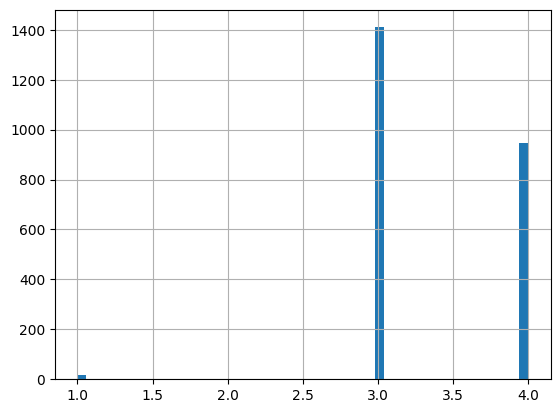

In [ ]:
# Map to exponential-width bins via the log function:
log_quantized_pip = np.floor(np.log10(X_base['pip_dosage(mg)']))
log_quantized_pip.hist(bins=50)

Text(0, 0.5, 'Occurrence')

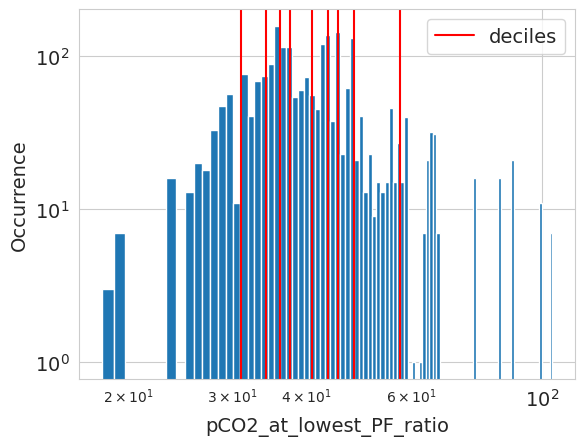

In [ ]:
# Approach 2: lets distribute the data into deciles
deciles = X_base['pCO2_at_lowest_PF_ratio'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
# Visualize the deciles on the histogram
sns.set_style('whitegrid')
fig, ax = plt.subplots()
X_base['pCO2_at_lowest_PF_ratio'].hist(ax=ax, bins=100)
for pos in deciles:
  handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('pCO2_at_lowest_PF_ratio', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

<Axes: >

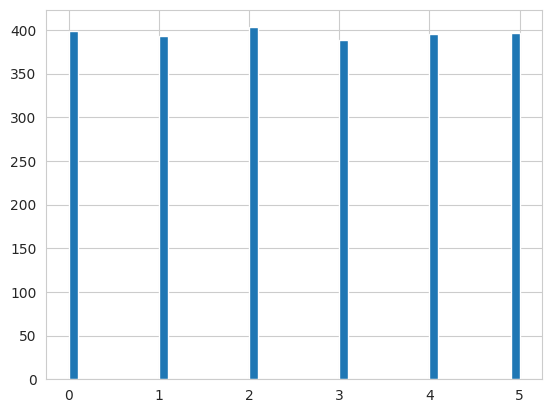

In [ ]:
# quantization with pandas:
#-------------------------------
# Map the counts to quartiles
log_quantized_pip = pd.qcut(X_base['pCO2_at_lowest_PF_ratio'], 6, labels=False)
log_quantized_pip.hist(bins=50)

# Data Imputation

Datasets may have missing values ad we need to decide what to do with such instances. Creating a statistical value for each column (such a mean), then substituting that statistic for all missing values for that column, is a common method for data imputation. It is a common strategy as the statistic can be easily calculated using the training dataset and it usually yields good performance. 

In [ ]:
# Lets create a defected dataset:
X_base_defect = X_base.mask(np.random.random(X_base.shape) < .05)

In [ ]:
# summarize the number of rows with missing values for each column
columns = X_base_defect.columns
for i in range(X_base_defect.shape[1]):
  # count number of rows with missing values
  n_miss = X_base_defect[columns[i]].isnull().sum()
  percent = n_miss / X_base_defect.shape[0] * 100
  print('%s, Missing: %d (%.1f%%)' % (columns[i], n_miss, percent))

heathrate_min, Missing: 127 (5.3%)
heathrate_max, Missing: 119 (5.0%)
blood_pressure_min, Missing: 125 (5.3%)
blood_pressure_max, Missing: 118 (5.0%)
mean_art.bloodpressure_min, Missing: 125 (5.3%)
mean_art.bloodpressure_max, Missing: 117 (4.9%)
temp_min, Missing: 117 (4.9%)
temp_max, Missing: 127 (5.3%)
breathing_rate_min, Missing: 119 (5.0%)
breathing_rate_max, Missing: 120 (5.1%)
bicarbonate_min, Missing: 118 (5.0%)
bicarbonate_max, Missing: 113 (4.8%)
ph_min, Missing: 115 (4.8%)
ph_max, Missing: 127 (5.3%)
PF_ratio_min, Missing: 132 (5.6%)
pO2_at_lowest_PF_ratio, Missing: 104 (4.4%)
FIO2_at_lowest_PF_ratio, Missing: 125 (5.3%)
pCO2_at_lowest_PF_ratio, Missing: 129 (5.4%)
urine_output(mL), Missing: 114 (4.8%)
kreatinin_min, Missing: 122 (5.1%)
kreatinin_max, Missing: 117 (4.9%)
crp_max, Missing: 123 (5.2%)
pct_max, Missing: 117 (4.9%)
hematocrit_min, Missing: 112 (4.7%)
hematocrit_max, Missing: 114 (4.8%)
leukocytes_min, Missing: 120 (5.1%)
leukocytes_max, Missing: 137 (5.8%)
thromb

In [ ]:
X_base_defect.isna().sum()

heathrate_min                 127
heathrate_max                 119
blood_pressure_min            125
blood_pressure_max            118
mean_art.bloodpressure_min    125
mean_art.bloodpressure_max    117
temp_min                      117
temp_max                      127
breathing_rate_min            119
breathing_rate_max            120
bicarbonate_min               118
bicarbonate_max               113
ph_min                        115
ph_max                        127
PF_ratio_min                  132
pO2_at_lowest_PF_ratio        104
FIO2_at_lowest_PF_ratio       125
pCO2_at_lowest_PF_ratio       129
urine_output(mL)              114
kreatinin_min                 122
kreatinin_max                 117
crp_max                       123
pct_max                       117
hematocrit_min                112
hematocrit_max                114
leukocytes_min                120
leukocytes_max                137
thrombocit_min                120
total_daily_dose(mg)          107
contd_inf_rate

## SimpleImputer from Scikit-learn

In [ ]:
'''
SimpleImputer
--------------------------------------------------------------------------------------------------------
If “mean”, then replace missing values using the mean along each column. Can only be used with numeric data.
If “median”, then replace missing values using the median along each column. Can only be used with numeric data.
If “most_frequent”, then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.
If “constant”, then replace missing values with fill_value. Can be used with strings or numeric data.
--------------------------------------------------------------------------------------------------------
https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#
'''
imputer = SimpleImputer(strategy='median')
# fit on the dataset
imputer.fit(X_base_defect)
# transform the dataset
X_base_filled = imputer.transform(X_base_defect)
X_base_filled = pd.DataFrame(X_base_filled,columns=columns)
X_base_filled.isna().sum()

heathrate_min                 0
heathrate_max                 0
blood_pressure_min            0
blood_pressure_max            0
mean_art.bloodpressure_min    0
mean_art.bloodpressure_max    0
temp_min                      0
temp_max                      0
breathing_rate_min            0
breathing_rate_max            0
bicarbonate_min               0
bicarbonate_max               0
ph_min                        0
ph_max                        0
PF_ratio_min                  0
pO2_at_lowest_PF_ratio        0
FIO2_at_lowest_PF_ratio       0
pCO2_at_lowest_PF_ratio       0
urine_output(mL)              0
kreatinin_min                 0
kreatinin_max                 0
crp_max                       0
pct_max                       0
hematocrit_min                0
hematocrit_max                0
leukocytes_min                0
leukocytes_max                0
thrombocit_min                0
total_daily_dose(mg)          0
contd_inf_rate(mL/h)          0
pip_dosage(mg)                0
sample_c

## kNN Imputer from Scikit-learn

In [ ]:
'''
kNN Imputer:
--------------------------------------------------------------------------------------------------------
KNNImputer(*, missing_values=nan, n_neighbors=5, weights='uniform', metric='nan_euclidean', 
           copy=True, add_indicator=False, keep_empty_features=False)
===
n_neighborsint, default=5
missing_valuesint, float, str, np.nan or None, default=np.nan
n_nearest_featuresint, default=None
metric{‘nan_euclidean’} or callable, default=’nan_euclidean’
--------------------------------------------------------------------------------------------------------
https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer 
'''
# define imputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(X_base_defect)
# transform the dataset
X_base_filled = imputer.transform(X_base_defect)
X_base_filled = pd.DataFrame(X_base_filled,columns=columns)
X_base_filled.isna().sum()

heathrate_min                 0
heathrate_max                 0
blood_pressure_min            0
blood_pressure_max            0
mean_art.bloodpressure_min    0
mean_art.bloodpressure_max    0
temp_min                      0
temp_max                      0
breathing_rate_min            0
breathing_rate_max            0
bicarbonate_min               0
bicarbonate_max               0
ph_min                        0
ph_max                        0
PF_ratio_min                  0
pO2_at_lowest_PF_ratio        0
FIO2_at_lowest_PF_ratio       0
pCO2_at_lowest_PF_ratio       0
urine_output(mL)              0
kreatinin_min                 0
kreatinin_max                 0
crp_max                       0
pct_max                       0
hematocrit_min                0
hematocrit_max                0
leukocytes_min                0
leukocytes_max                0
thrombocit_min                0
total_daily_dose(mg)          0
contd_inf_rate(mL/h)          0
pip_dosage(mg)                0
sample_c

## Iterative imputation
In this approach, each feature is modeled as a function of the other features, e.g. a regression problem. Each feature is imputed sequentially, one after the other, allowing prior imputed values to be used as part of a model in predicting subsequent features. 

In [ ]:
'''
IterativeImputer:
--------------------------------------------------------------------------------------------------------
IterativeImputer(estimator=None, *, missing_values=nan, sample_posterior=False, max_iter=10, 
                 tol=0.001, n_nearest_features=None, initial_strategy='mean', imputation_order='ascending', 
                 skip_complete=False, min_value=-inf, max_value=inf, verbose=0, random_state=None, add_indicator=False,
                 keep_empty_features=False)
===
--------------------------------------------------------------------------------------------------------
https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#
'''
# define imputer
imputer = IterativeImputer()
# fit on the dataset
imputer.fit(X_base_defect)
# transform the dataset
X_base_filled = imputer.transform(X_base_defect)
X_base_filled = pd.DataFrame(X_base_filled,columns=columns)
X_base_filled.isna().sum()

heathrate_min                 0
heathrate_max                 0
blood_pressure_min            0
blood_pressure_max            0
mean_art.bloodpressure_min    0
mean_art.bloodpressure_max    0
temp_min                      0
temp_max                      0
breathing_rate_min            0
breathing_rate_max            0
bicarbonate_min               0
bicarbonate_max               0
ph_min                        0
ph_max                        0
PF_ratio_min                  0
pO2_at_lowest_PF_ratio        0
FIO2_at_lowest_PF_ratio       0
pCO2_at_lowest_PF_ratio       0
urine_output(mL)              0
kreatinin_min                 0
kreatinin_max                 0
crp_max                       0
pct_max                       0
hematocrit_min                0
hematocrit_max                0
leukocytes_min                0
leukocytes_max                0
thrombocit_min                0
total_daily_dose(mg)          0
contd_inf_rate(mL/h)          0
pip_dosage(mg)                0
sample_c

# Outlier Detection and Removal

## Standard Deviation based Filtering

A value that falls outside of 3 standard deviations is part of the distribution, but it is an unlikely or rare event at approximately 1 in 370 samples. 

- For small datasets: 2 SD (95%) 
- For large datasets: 4 SD (99.9%) 

If you have multiple columns in your dataframe and would like to remove all rows that have **outliers in at least one column**:

In [ ]:
print(X_base.shape)
# Calculation:
#   For each column, it first computes the Z-score of each value in the column, relative to the column mean and standard deviation.
#   It takes the absolute Z-score (https://en.wikipedia.org/wiki/Standard_score)
#   all(axis=1) ensures that for each row, all column satisfy the constraint.
#   To specify a column for the zscore, df[0] for example, and remove .all(axis=1):
#       df[(np.abs(stats.zscore(df[0])) < 4)]
#   The result of this condition is used to index the dataframe.
X_filtered_sd = X_base[(np.abs(stats.zscore(X_base)) < 4).all(axis=1)]
print(X_filtered_sd.shape)

(2374, 37)
(2127, 37)


It looks like a bunch of datapoints are away from the main behaviour of the data. At this point, we should remember the histograms; it is okay to delete some data based of a Gaussian distribution assumption?

## Using quantiles for filtering

Not all data is normal or normal enough to treat it as being drawn from a Gaussian distribution. A good statistic for summarizing a **non-Gaussian distribution** data is the **Interquartile Range (IQR)**. IQR is calculated as the difference between the 75th and the 25th percentiles of the data ( what we see as the box in a box and whisker plot):

IQR = Q3 - Q1

The IQR can be used to identify outliers by a factor k of the IQR below the 25th percentile or above the 75th percentile. 

- The common value for the factor k is the value 1.5. 
- A factor k of 3 or more can be used to identify values that are
extreme outliers.

In [ ]:
Q1 = X_base.quantile(0.25)
Q3 = X_base.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

heathrate_min                    20.000000
heathrate_max                    26.500000
blood_pressure_min               19.500000
blood_pressure_max               33.000000
mean_art.bloodpressure_min       13.000000
mean_art.bloodpressure_max       21.500000
temp_min                          0.900000
temp_max                          1.000000
breathing_rate_min                6.000000
breathing_rate_max                9.000000
bicarbonate_min                   4.700000
bicarbonate_max                   5.100000
ph_min                            0.092625
ph_max                            0.070000
PF_ratio_min                    114.000000
pO2_at_lowest_PF_ratio           19.118604
FIO2_at_lowest_PF_ratio          16.000000
pCO2_at_lowest_PF_ratio          11.653875
urine_output(mL)               2273.750000
kreatinin_min                   106.000000
kreatinin_max                    96.300000
crp_max                         143.850000
pct_max                           5.610000
hematocrit_

Lets see how much data points we would loose if we apply the common heuristics:

In [ ]:
print(X_base.shape)
# Anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed:
#------------------------------------------------------------------------------------------------
#Tilde sign (~) in pandas is used when we work with Boolean values. 
# This tilde sign works as a negation operator that means is used to reverse the Boolean values.
#------------------------------------------------------------------------------------------------
#exp1 & exp2                # Element-wise logical AND
#exp1 | exp2                # Element-wise logical OR
#~exp1                      # Element-wise logical NOT
#------------------------------------------------------------------------------------------------
df_filtered_q = X_base[~((X_base < (Q1 - 1.5 * IQR)) |(X_base > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_filtered_q.shape)

(2374, 37)
(557, 37)


Lets apply a safer margin:

In [ ]:
print(X_base.shape)
# Anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed:
#------------------------------------------------------------------------------------------------
#Tilde sign (~) in pandas is used when we work with Boolean values. 
# This tilde sign works as a negation operator that means is used to reverse the Boolean values.
#------------------------------------------------------------------------------------------------
#exp1 & exp2                # Element-wise logical AND
#exp1 | exp2                # Element-wise logical OR
#~exp1                      # Element-wise logical NOT
#------------------------------------------------------------------------------------------------
df_filtered_q = X_base[~((X_base < (Q1 - 3 * IQR)) |(X_base > (Q3 + 3 * IQR))).any(axis=1)]
print(df_filtered_q.shape)

(2374, 37)
(1152, 37)


Looks like data includes lots of outliers. Lets visualize some of them.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'heathrate_min'),
  Text(1, 0, 'heathrate_max'),
  Text(2, 0, 'blood_pressure_min'),
  Text(3, 0, 'blood_pressure_max'),
  Text(4, 0, 'mean_art.bloodpressure_min'),
  Text(5, 0, 'mean_art.bloodpressure_max'),
  Text(6, 0, 'temp_min'),
  Text(7, 0, 'temp_max'),
  Text(8, 0, 'breathing_rate_min'),
  Text(9, 0, 'breathing_rate_max'),
  Text(10, 0, 'bicarbonate_min'),
  Text(11, 0, 'bicarbonate_max')])

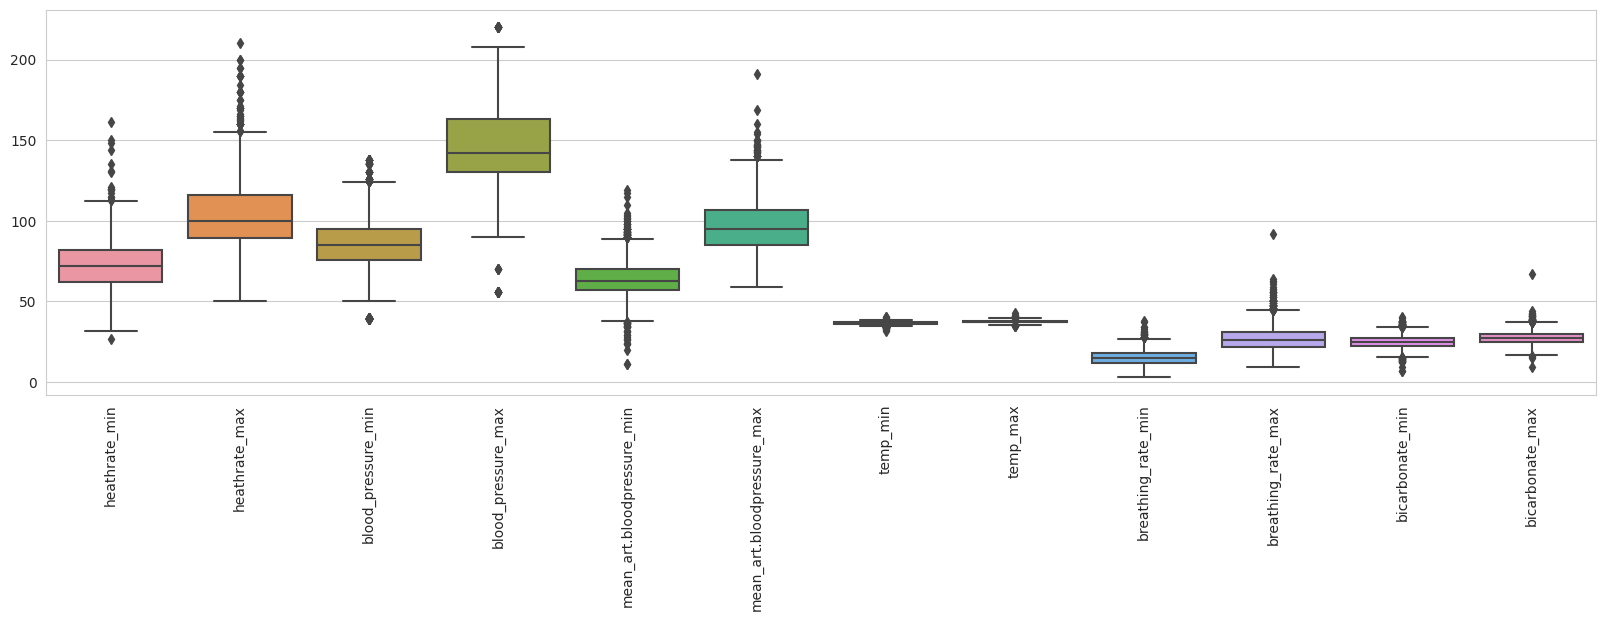

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(data=X_base.iloc[:, 0:12])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'heathrate_min'),
  Text(1, 0, 'heathrate_max'),
  Text(2, 0, 'blood_pressure_min'),
  Text(3, 0, 'blood_pressure_max'),
  Text(4, 0, 'mean_art.bloodpressure_min'),
  Text(5, 0, 'mean_art.bloodpressure_max'),
  Text(6, 0, 'temp_min'),
  Text(7, 0, 'temp_max'),
  Text(8, 0, 'breathing_rate_min'),
  Text(9, 0, 'breathing_rate_max'),
  Text(10, 0, 'bicarbonate_min'),
  Text(11, 0, 'bicarbonate_max')])

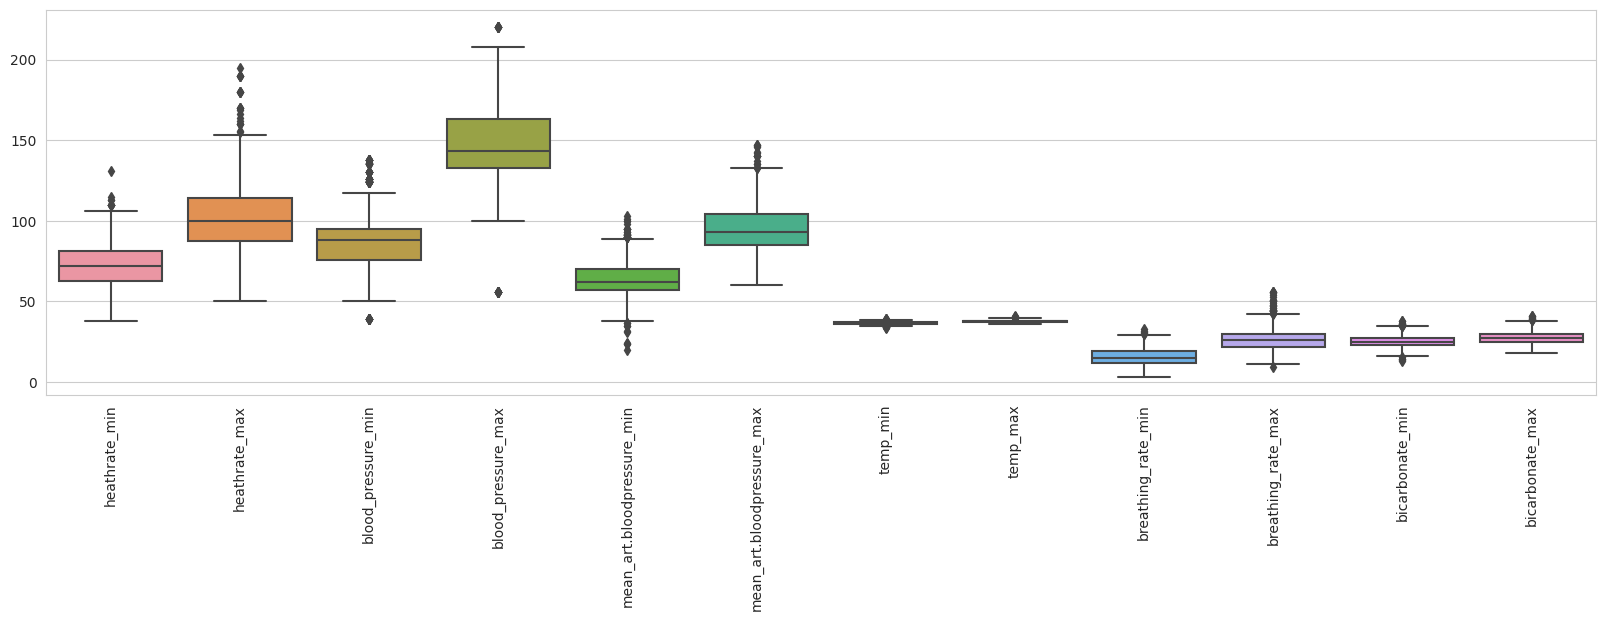

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df_filtered_q.iloc[:, 0:12])
plt.xticks(rotation=90)

Considering the nature of the problem, we will keep all the rows. 

# Feature Scaling

## Exploring scalers

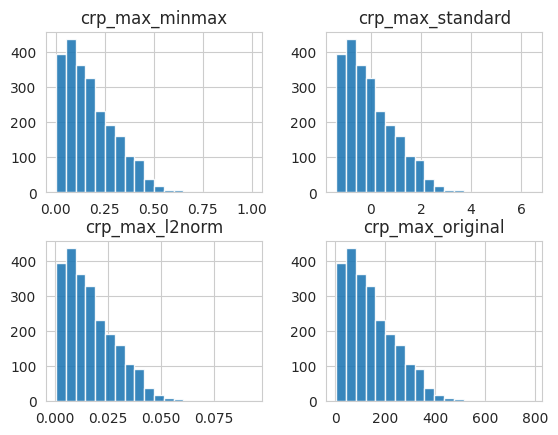

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from numpy.linalg import norm
import matplotlib.pyplot as plt

# getting a column for illustrative purposes: select the 'crp_max' column
crp_max_col = X_base['crp_max'] 

# create scalers for min-max, standard, and l-2 norm scaling
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
l2_norm_scaler = lambda x: x/norm(x)

# apply scaling to the selected column and create new columns
scaled_cols = {
    'crp_max_minmax': min_max_scaler.fit_transform(crp_max_col.values.reshape(-1, 1)).flatten(),
    'crp_max_standard': standard_scaler.fit_transform(crp_max_col.values.reshape(-1, 1)).flatten(),
    'crp_max_l2norm': l2_norm_scaler(crp_max_col.values).flatten(),
    'crp_max_original': crp_max_col.values.flatten()
}

# create a new dataframe with the scaled columns
scale_comparison = pd.DataFrame(scaled_cols)

# plot histograms of all columns
scale_comparison.hist(bins=20, alpha=0.89)
plt.show()

## Data Split to prevent leakage

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_base, y_base, test_size=0.2, stratify=y_base, random_state=12)

In [ ]:
# Fit on the training dataset
#Rescaling the data
featuresToScale = X_train.columns
sX = StandardScaler(copy=True)
sX.fit(X_train[featuresToScale])
# scale the training dataset
X_train.loc[:,featuresToScale] = sX.transform(X_train[featuresToScale])
# scale the test dataset
X_test.loc[:,featuresToScale] = sX.transform(X_test)

# Automatic Outlier Detection Techniques

### Local Outlier Factor

It measures the local deviation of the density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood. More precisely, locality is given by k-nearest neighbors, whose distance is used to estimate the local density.

In [ ]:
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)

(1899, 37) (1899,)


In [ ]:
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train_lof,  y_train_lof = X_train.loc[mask], y_train.loc[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
print(X_train_lof.shape, y_train_lof.shape)

(1899, 37) (1899,)
(1866, 37) (1866,)


### Isolation Forest

Isolation Forest is a model-based outlier detection method that attempts to isolate anomalies from the rest of the data using an ensemble of decision trees. It does not rely on training a model on labelled data.

This method selects a feature and makes a random split in the data between the minimum and maximum values. This process then carries on down the decision tree until all possible splits have been made in the data or a limit on the number of splits is reached.

Any anomalies/outliers will be split off early in the process making them easy to identify and isolate from the rest of the data.

In [ ]:
#-----------------------------------------------------------------------------------------------------------------------------
#class sklearn.ensemble.IsolationForest(*, n_estimators=100, max_samples='auto', contamination='auto', max_features=1.0,  
#                                       bootstrap=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest 
#-----------------------------------------------------------------------------------------------------------------------------
# Hyperparameters:
#=================
# contamination‘auto’ or float, default=’auto’.: The amount of contamination of the data set, i.e. the proportion of 
#     outliers in the data set. Used when fitting to define the threshold on the scores of the samples.
#     If ‘auto’, the threshold is determined as in the original paper.

model=IsolationForest(n_estimators=160, max_samples='auto',max_features=3)

In [ ]:
model.fit(X_train)

IsolationForest(max_features=3, n_estimators=160)

In [ ]:
anomaly_score = model.predict(X_train)
mask = anomaly_score !=-1
# Creating filtered DF:
X_train_if,  y_train_if = X_train.loc[mask], y_train.loc[mask]

In [ ]:
print(X_train.shape, y_train.shape)
print(X_train_if.shape, y_train_if.shape)

(1899, 37) (1899,)
(1868, 37) (1868,)


### Merging the common selections

We used two methods to detect outliers. Herein, we will create a union dataset, where both says it is a regular instance.

In [ ]:
X_merged = pd.concat([X_train_lof,X_train_if],ignore_index=True)
y_merged = pd.concat([y_train_lof,y_train_if],ignore_index=True)

In [ ]:
# Getting labels to the same axis:
X_merged['sofa_score'] = y_merged
X_merged.head(5)

,heathrate_min,heathrate_max,blood_pressure_min,blood_pressure_max,mean_art.bloodpressure_min,mean_art.bloodpressure_max,temp_min,temp_max,breathing_rate_min,breathing_rate_max,...,total_daily_dose(mg),contd_inf_rate(mL/h),pip_dosage(mg),sample_conc(mg/L),pip_dosage(mg).1,new_dosage(mL/h),Age,Height,Weight,sofa_score
0,1.126054,-1.547915,-0.953640,-0.634195,-0.353189,0.854177,-0.437942,-0.666254,-0.308517,0.265902,...,-0.053803,-1.081998,-1.914611,-0.261883,-1.233522,-0.841222,1.733719,-1.081567,-0.716940,5.0
1,1.528200,0.710900,0.558772,1.832557,-0.353189,-0.413677,-0.701061,-0.789510,0.127447,-0.688667,...,-0.054086,-0.004627,-2.071013,1.719973,0.782610,-0.242314,0.321913,0.064312,-0.623321,11.0
2,-1.152772,-1.086932,0.316786,1.206080,-0.612757,-0.477070,0.877651,0.196534,-0.744481,-0.825034,...,-0.052498,-0.004627,0.925627,-0.016844,-0.523710,-0.242314,-0.644060,-0.394040,-1.887173,7.0
3,0.321763,0.065524,-1.014137,0.383829,0.165947,0.347036,0.746092,0.443045,-0.526499,-1.370502,...,-0.055438,-0.015053,1.694099,-0.191798,-0.759392,-0.002751,-0.718366,1.439366,0.546912,11.0
4,-0.683602,-1.133031,0.679765,0.481716,-0.309928,-0.825730,0.614533,0.196534,-0.112333,-0.975038,...,0.003047,0.290782,1.167391,-0.819969,0.783840,0.356594,-1.535727,0.751839,-0.155228,5.0


In [ ]:
# Narrowing down to unique rows, so that the duplicates will be deleted:
duplicates = X_merged.duplicated()
# report if there are any duplicates:
print(duplicates.any())
X_merged[duplicates].shape

True


(1840, 38)

In [ ]:
# Original dataframe:
print('merged DF shape: ',X_merged.shape)
# delete duplicate rows
X_merged.drop_duplicates(inplace=True)
print('cleaned duplicates: ',X_merged.shape)
print('Original training dataset',X_train.shape)

merged DF shape:  (3734, 38)
cleaned duplicates:  (1894, 38)
Original training dataset (1899, 37)


We have followed two alternative paths for outlier detection; statistical distribution of the original features and using data driven models. Former marked many instances, while the latter marked very few. Why?

We do not know whether it is due to existing multi-feature correlations, or simply due to curse of dimensionality, where the distinction between outliers and regular points gets difficult.

For the time being, lets keep all instances.

# Simple feature transformations

Some ML model, like linear regression model derivatives, works much better if the input features are normal distributions. But this may not be the case. 

If you would like to try out mapping the input features to a normal like distributions, you can use power transforms.

Power transforms are known for their ability to stabilize variance in statistical analysis. The Poisson distribution is a good example: it is a heavy-tailed distribution, where the variance is equal to the mean. This means that the larger the mean, the larger the variance and the heavier the tail of the distribution. By applying power transforms, the distribution of the variable is altered so that the variance is no longer linked to the mean. For instance, if X follows a Poisson distribution, applying a power transform can help stabilize the variance and make it independent of the mean.

A simple generalization of both the square root transform and the log transform is known as the [Box-Cox transform](https://en.wikipedia.org/wiki/Power_transform#Box%E2%80%93Cox_transformation).

<Axes: >

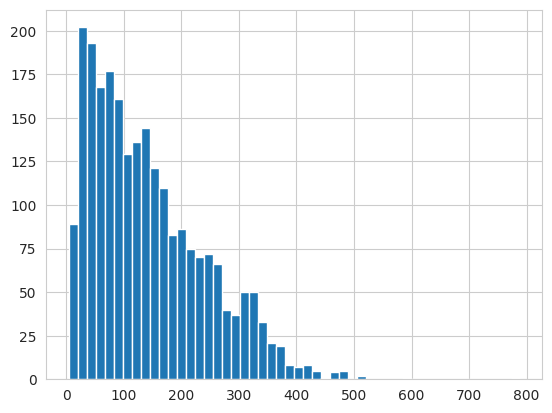

In [ ]:
X_base['crp_max'].hist(bins=50)

In [ ]:
from scipy import stats
# The Box-Cox transform assumes that input data is positive. Check the min to make sure that is the case.
print(X_base['crp_max'].min())

4.3


0.32287128024827005


<Axes: >

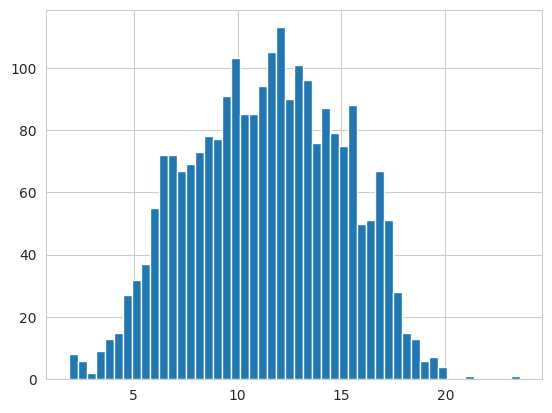

In [ ]:
# By default, the scipy will make the output the closest to a normal distribution:
sample_con_scaled, bc_params = stats.boxcox(X_base['crp_max'])
print(bc_params)
pd.Series(sample_con_scaled).hist(bins=50)

# Feature Selection

## Filter Methods - I: Numerical => Categorical

In this dataset, the **input is continuous numerical values**, while the otput can be treated as either **numerical or categorical**. 

Commonly applied filtering methods for such a case are:

***numerical => numerical:***

* Pearson
* Spearman
* Mutual Information

***numerical => categorical:***

* ANOVA
* Kendall
* Mutual Information

But before that, we can look at the columns first individually and apply a threshold value for variance, and delete some of them if they do not change much.

### Variance Threshold

`VarianceThreshold` is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. 

Variance is the average squared difference of values in the sample from the mean. For example, a column that has a single value has a variance of 0.0. Few unique features also lead to a small variance.

By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

In [ ]:
# Testing default option (check for single value columns):
transform = VarianceThreshold()
# transform the input data
X_selected = transform.fit_transform(X_train)
print(X_train.shape)
print(X_selected.shape)

(1899, 37)
(1899, 37)


As expected, nothing is filtered out. 

One option here is to scan through the dataset with changing variance to have a feeling about the feature distributions. We can collect and visualize how the number of features changes with the threshold value.

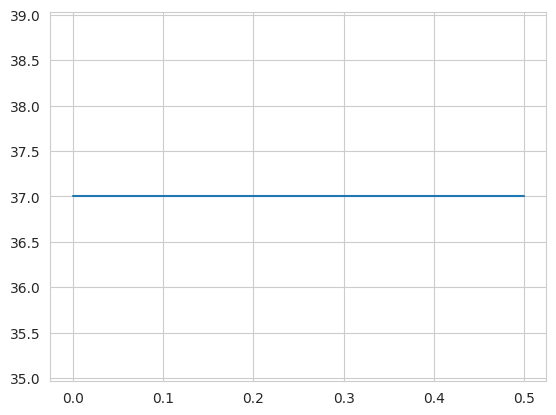

In [ ]:
# define thresholds to check
thresholds = np.arange(0.0, 0.55, 0.05)
# apply transform with each threshold
results_varThreshold = list()
for t in thresholds:
  # looping over the threshold:
  transform_ = VarianceThreshold(threshold=t)
  # transform in the loop
  X_sel = transform_.fit_transform(X_train)
  # Number of remained features
  n_features = X_sel.shape[1]
  #print('Threshold>%.2f, Features=%d' % (t, n_features))
  # store the result
  results_varThreshold.append(n_features)
# plot the threshold vs the number of selected features
plt.plot(thresholds, results_varThreshold)
plt.show()

In our case, we confirmed that data distribution is indeed continuous!

### ANOVA F-test 

ANOVA is used when one variable is numeric and one is categorical, as in our case. In essence, it gives us the features that are independent of the
target variable, so that we can remove them from the dataset. 

https://en.wikipedia.org/wiki/F-test 



In Scikit-learn, we have several alternative implementations under the **Univariate feature selection**:

https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection 

Lets try SelectKBest:


In [ ]:
'''
SelectKBest: Select features according to the k highest scores
----------------------------------------------------------
score_funccallable, default=f_classif
                    Function taking two arrays X and y, and returning a pair of arrays (scores, pvalues) or a single array with scores.
                    Default is f_classif. The default function only works with classification tasks.

f_classif:  ANOVA F-value between label/feature for classification tasks.
----------------------------------------------------------
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest
'''
# Select all features to see their relative impact:
anova = SelectKBest(score_func=f_classif, k='all')
# Fitting:
anova.fit(X_train, y_train)
# transform:
X_train_anova = anova.transform(X_train)

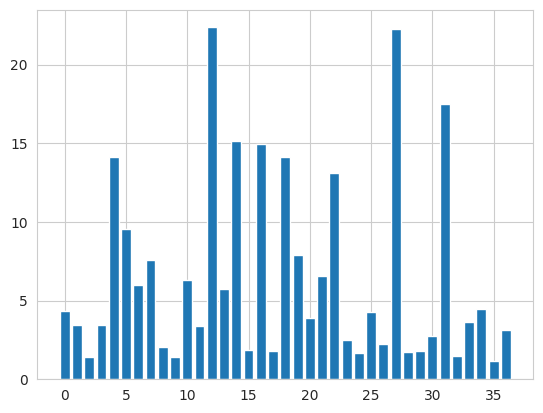

In [ ]:
# plot the scores
plt.bar([i for i in range(len(anova.scores_))], anova.scores_)
plt.show()

### Mutual Information

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable. 

In [ ]:
# configure to select all features
mi = SelectKBest(score_func=mutual_info_classif, k='all')
# learn relationship from training data
mi.fit(X_train, y_train)
X_train_mi = mi.transform(X_train)

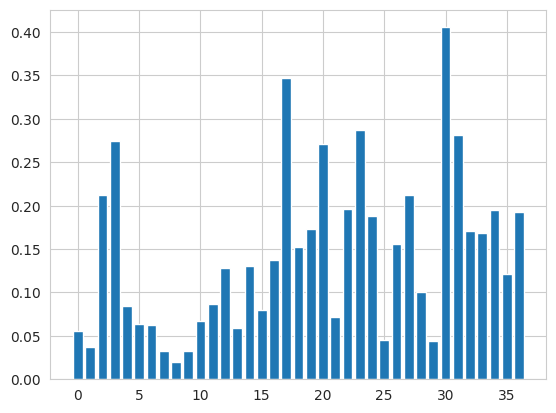

In [ ]:
# plot the scores
plt.bar([i for i in range(len(mi.scores_))], mi.scores_)
plt.show()

### Assessment for Feature Selection Capabilities: ANOVA

#### Logistic Regression

In [ ]:
# Baseline Model: Direct Utilization of Features
#----------------------------------------------------
# fit the model with X_train --- default settings ---
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
y_predict = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, y_predict)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 19.58


In [ ]:
# Baseline Model: ANOVA
#----------------------------------------------------
# fit the model with X_anova --- default settings ---
#----------------------------------------------------
# Select all features to see their relative impact:
anova = SelectKBest(score_func=f_classif, k=15)
# Fitting:
anova.fit(X_train, y_train)
# transform:
X_train_anova = anova.transform(X_train)
model = LogisticRegression(solver='liblinear')
model.fit(X_train_anova, y_train)
# evaluate the model
X_test_anova = anova.transform(X_test)
y_predict = model.predict(X_test_anova)
# evaluate predictions
accuracy = accuracy_score(y_test, y_predict)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 18.74


#### Random Forest Classifier

In [ ]:
# Random Forest Classifier
# Hyperparameters:
#You need to check model descriptions for the hyperparameters. 
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier
#-----------------------------------------------------------------
# Number of trees in the forest:
n_estimators = 100
# Number of features to consider when looking for the best split:
max_features='sqrt'
# Maximum depth of the tree:
max_depth = None
# Minimum number of samples required to split an internal node:
min_samples_split = 20
# Minimum number of samples required to be at a leaf node:
min_samples_leaf = 10
# Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. 
max_leaf_nodes = None
# Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree:
bootstrap = False
# Whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.
oob_score = False
# Number of jobs to run in parallel. (-1) means use all.
n_jobs = -1
# Random state
random_state = 2021
#-----------------------------------------------------------------
# Creating the classifier:
RFC = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, \
                              max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap,oob_score=oob_score, n_jobs=n_jobs, random_state=random_state)

In [ ]:
RFC.fit(X_train, y_train)
# evaluate the model
y_predict = RFC.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, y_predict)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 33.05


In [ ]:
RFC.fit(X_train_anova, y_train)
# evaluate the model
X_test_anova = anova.transform(X_test)
y_predict = RFC.predict(X_test_anova)
# evaluate predictions
accuracy = accuracy_score(y_test, y_predict)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 30.53


#### Looping: RFC

In [ ]:
# Scanning through N number of features:
num_features = [i+1 for i in range(X_train.shape[1])]
# enumerate each number of features
results = list()

In [ ]:
# evaluate a given model using cross-validation
def evaluate_model(model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
  scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores

In [ ]:
# enumerate each number of features
results = list()
for k in num_features:
  # create pipeline
  fs_anova = SelectKBest(score_func=f_classif, k=k)
  pipeline = Pipeline(steps=[('anova',fs_anova), ('lr', RFC)])
  # evaluate the model
  scores = evaluate_model(pipeline)
  results.append(scores)
  # summarize the results
  print('%d %.3f (%.3f)' % (k, mean(scores), std(scores)))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


1 0.141 (0.023)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


2 0.163 (0.027)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


3 0.173 (0.027)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


4 0.186 (0.024)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


5 0.190 (0.024)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


6 0.197 (0.024)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


7 0.206 (0.023)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


8 0.223 (0.026)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


9 0.218 (0.025)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


10 0.230 (0.023)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


11 0.233 (0.029)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


12 0.242 (0.027)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


13 0.238 (0.025)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


14 0.235 (0.031)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


15 0.233 (0.029)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


16 0.244 (0.027)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


17 0.251 (0.029)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


18 0.254 (0.032)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


19 0.259 (0.029)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


20 0.263 (0.030)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


21 0.265 (0.031)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


22 0.268 (0.029)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


23 0.273 (0.028)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


24 0.275 (0.027)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


25 0.275 (0.025)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


26 0.272 (0.028)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


27 0.278 (0.029)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


28 0.284 (0.026)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


29 0.282 (0.025)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


30 0.283 (0.029)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


31 0.281 (0.028)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


32 0.284 (0.029)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


33 0.284 (0.028)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


34 0.286 (0.029)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


35 0.283 (0.026)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


36 0.289 (0.028)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


37 0.288 (0.029)


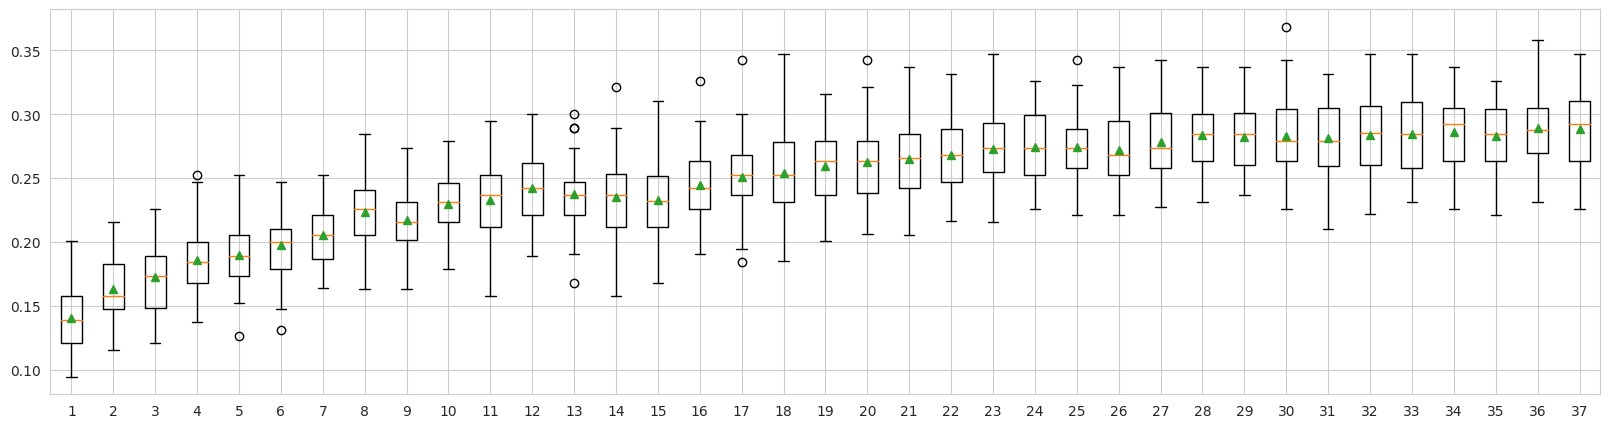

In [ ]:
# plot model performance:
plt.figure(figsize=(20,5))
plt.boxplot(results, labels=num_features, showmeans=True)
plt.show()

### Assessment for Feature Selection Capabilities: MI

#### Logistic Regression

In [ ]:
# Baseline Model: Direct Utilization of Features
#----------------------------------------------------
# fit the model with X_train --- default settings ---
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
y_predict = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, y_predict)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 19.58


In [ ]:
# Baseline Model: MI
#----------------------------------------------------
# fit the model with X_mi --- default settings ---
#----------------------------------------------------
# Select all features to see their relative impact:
mi = SelectKBest(score_func=mutual_info_classif, k=15)
# Fitting:
mi.fit(X_train, y_train)
# transform:
X_train_mi = mi.transform(X_train)
model = LogisticRegression(solver='liblinear')
model.fit(X_train_mi, y_train)
# evaluate the model
X_test_mi = anova.transform(X_test)
y_predict = model.predict(X_test_mi)
# evaluate predictions
accuracy = accuracy_score(y_test, y_predict)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 11.79


#### Random Forest Classifier

In [ ]:
# Random Forest Classifier
# Hyperparameters:
#You need to check model descriptions for the hyperparameters. 
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier
#-----------------------------------------------------------------
# Number of trees in the forest:
n_estimators = 100
# Number of features to consider when looking for the best split:
max_features='sqrt'
# Maximum depth of the tree:
max_depth = None
# Minimum number of samples required to split an internal node:
min_samples_split = 20
# Minimum number of samples required to be at a leaf node:
min_samples_leaf = 10
# Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. 
max_leaf_nodes = None
# Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree:
bootstrap = False
# Whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.
oob_score = False
# Number of jobs to run in parallel. (-1) means use all.
n_jobs = -1
# Random state
random_state = 2021
#-----------------------------------------------------------------
# Creating the classifier:
RFC = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, \
                              max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap,oob_score=oob_score, n_jobs=n_jobs, random_state=random_state)

In [ ]:
RFC.fit(X_train, y_train)
# evaluate the model
y_predict = RFC.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, y_predict)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 33.05


In [ ]:
RFC.fit(X_train_mi, y_train)
# evaluate the model
X_test_mi = mi.transform(X_test)
y_predict = RFC.predict(X_test_mi)
# evaluate predictions
accuracy = accuracy_score(y_test, y_predict)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 29.89


#### Looping: RFC

In [ ]:
# Scanning through N number of features:
num_features = [i+1 for i in range(X_train.shape[1])]
# enumerate each number of features
results = list()

In [ ]:
# evaluate a given model using cross-validation
def evaluate_model(model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
  scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores

In [ ]:
# enumerate each number of features: MI
results = list()
for k in num_features:
  # create pipeline
  fs_mi = SelectKBest(score_func=mutual_info_classif, k=k)
  pipeline = Pipeline(steps=[('mi',fs_mi), ('lr', RFC)])
  # evaluate the model
  scores = evaluate_model(pipeline)
  results.append(scores)
  # summarize the results
  print('%d %.3f (%.3f)' % (k, mean(scores), std(scores)))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


1 0.192 (0.026)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


2 0.217 (0.030)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


3 0.225 (0.030)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


4 0.227 (0.029)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


5 0.232 (0.027)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


6 0.238 (0.025)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


7 0.247 (0.028)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


8 0.245 (0.029)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


9 0.249 (0.026)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


10 0.253 (0.024)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


11 0.252 (0.030)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


12 0.255 (0.023)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


13 0.258 (0.027)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


14 0.257 (0.025)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


15 0.252 (0.025)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


16 0.257 (0.026)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


17 0.259 (0.028)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


18 0.262 (0.027)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


19 0.264 (0.027)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


20 0.264 (0.030)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


21 0.266 (0.029)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


22 0.273 (0.034)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


23 0.276 (0.029)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


24 0.279 (0.029)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


25 0.277 (0.028)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


26 0.281 (0.027)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


27 0.281 (0.027)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


28 0.283 (0.028)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


29 0.281 (0.029)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


30 0.284 (0.029)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


31 0.285 (0.030)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


32 0.281 (0.027)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


33 0.283 (0.029)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


34 0.283 (0.028)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


35 0.285 (0.028)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


36 0.281 (0.032)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


37 0.288 (0.029)


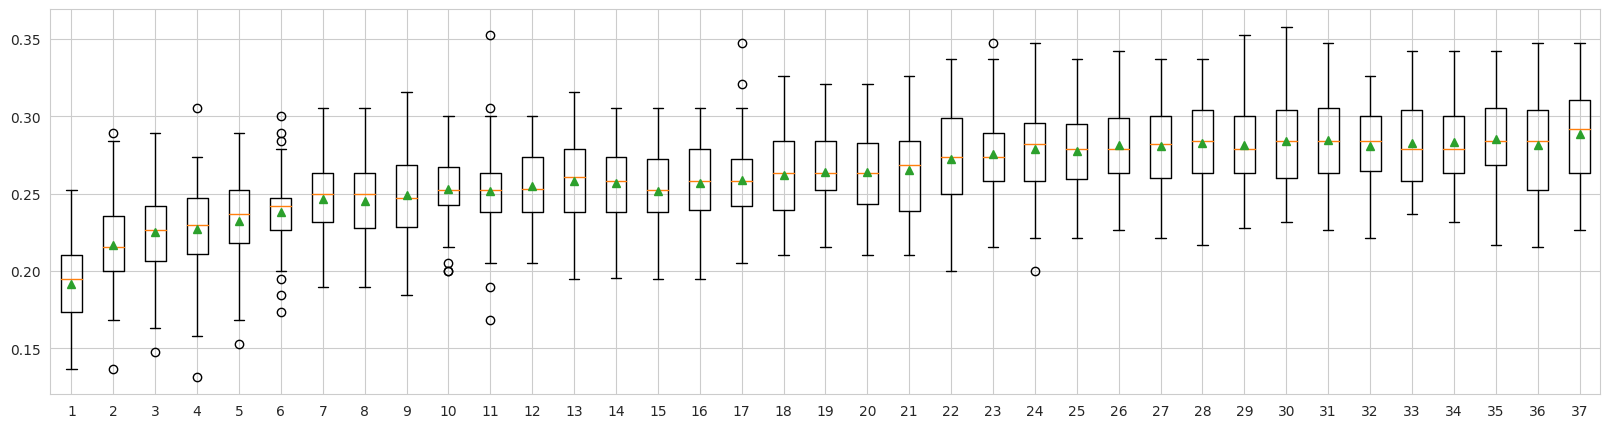

In [ ]:
# plot model performance:
plt.figure(figsize=(20,5))
plt.boxplot(results, labels=num_features, showmeans=True)
plt.show()

As expected, approaching the labels as a multi-class classification was quite difficult. Lets follow a different path and say they are continuous enough. 

## Filter Methods - II: Numerical => Numerical

### Pearson’s correlation coefficient => Linear

Correlation is a measure of how two variables change together.  Pearson’s correlation is a measure of linear correlation between two sets of data. 

It is the ratio between the covariance of two variables and the product of their standard deviations; thus, it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1. 



In [ ]:
'''
SelectKBest: Select features according to the k highest scores
----------------------------------------------------------
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest
'''
# Select all features to see their relative impact: here the score function is changed!
pearson = SelectKBest(score_func=f_regression, k='all')
# Fitting:
pearson.fit(X_train, y_train)
# transform:
X_train_pearson = pearson.transform(X_train)

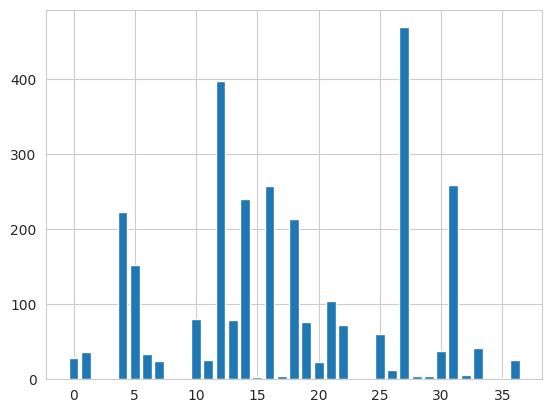

In [ ]:
# plot the scores
plt.bar([i for i in range(len(pearson.scores_))], pearson.scores_)
plt.show()

### Mutual Information

In [ ]:
# configure to select all features
mi = SelectKBest(score_func=mutual_info_regression, k='all')
# learn relationship from training data
mi.fit(X_train, y_train)
X_train_mi = mi.transform(X_train)

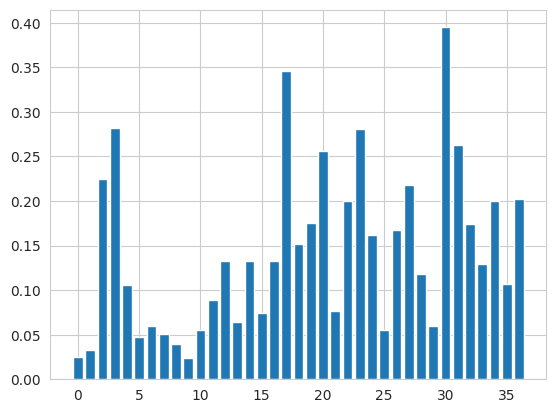

In [ ]:
# plot the scores
plt.bar([i for i in range(len(mi.scores_))], mi.scores_)
plt.show()

### Assessment for Feature Selection Capabilities: Pearson

#### Linear Regresssion

In [ ]:
# Baseline Model: Direct Utilization of Features
#----------------------------------------------------
# fit the model with X_train --- default settings ---
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
y_predict = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 2.120


In [ ]:
# Baseline Model: Pearson
#----------------------------------------------------
# fit the model with X_pearson --- default settings ---
#----------------------------------------------------
# Select all features to see their relative impact:
pearson = SelectKBest(score_func=f_regression, k=16)
# Fitting:
pearson.fit(X_train, y_train)
# transform:
X_train_pearson = pearson.transform(X_train)
model = LinearRegression()
model.fit(X_train_pearson, y_train)
# evaluate the model
X_test_pearson = pearson.transform(X_test)
y_predict = model.predict(X_test_pearson)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 2.243


#### Random Forest

In [ ]:
# Random Forest Regressor
# Hyperparameters:
#You need to check model descriptions for the hyperparameters. 
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier
#-----------------------------------------------------------------
# Number of trees in the forest:
n_estimators = 100
# Number of features to consider when looking for the best split:
max_features='sqrt'
# Maximum depth of the tree:
max_depth = None
# Minimum number of samples required to split an internal node:
min_samples_split = 20
# Minimum number of samples required to be at a leaf node:
min_samples_leaf = 10
# Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. 
max_leaf_nodes = None
# Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree:
bootstrap = False
# Whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.
oob_score = False
# Number of jobs to run in parallel. (-1) means use all.
n_jobs = -1
# Random state
random_state = 2021
# Criterion
criterion= 'absolute_error'
#-----------------------------------------------------------------
# Creating the classifier:
RFR = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, \
                              max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap,oob_score=oob_score, n_jobs=n_jobs, random_state=random_state,criterion=criterion)

In [ ]:
# Baseline Model: Direct Utilization of Features
#----------------------------------------------------
# fit the model with X_train --- default settings ---
RFR.fit(X_train, y_train)
# evaluate the model
y_predict = RFR.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 1.523


In [ ]:
# Baseline Model: Pearson
#----------------------------------------------------
# fit the model with X_pearson 
#----------------------------------------------------
# Select all features to see their relative impact:
pearson = SelectKBest(score_func=f_regression, k=16)
# Fitting:
pearson.fit(X_train, y_train)
# transform:
X_train_pearson = pearson.transform(X_train)
RFR.fit(X_train_pearson, y_train)
# evaluate the model
X_test_pearson = pearson.transform(X_test)
y_predict = RFR.predict(X_test_pearson)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 1.632


#### Support Vector Machines

In [ ]:
# Hyperparameters:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#
#__________________________________________________________________________________________
kernel='linear' 
gamma='scale' #Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. When scaled, uses 1 / (n_features * X.var()) as value of gamma.
C=1.0
epsilon=0.1    # Default
shrinking=True # Whether to use the shrinking heuristic. 
tol=0.00001
#Setting the model:
svr_basic = SVR(kernel= kernel, gamma=gamma, tol=tol, C=C, epsilon=epsilon, shrinking=shrinking)

In [ ]:
# Baseline Model: Direct Utilization of Features
#----------------------------------------------------
# fit the model with X_train --- default settings ---
svr_basic.fit(X_train, y_train)
# evaluate the model
y_predict = svr_basic.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 2.079


In [ ]:
# Baseline Model: Pearson
#----------------------------------------------------
# fit the model with X_pearson 
#----------------------------------------------------
# Select all features to see their relative impact:
pearson = SelectKBest(score_func=f_regression, k=16)
# Fitting:
pearson.fit(X_train, y_train)
# transform:
X_train_pearson = pearson.transform(X_train)
svr_basic.fit(X_train_pearson, y_train)
# evaluate the model
X_test_pearson = pearson.transform(X_test)
y_predict = svr_basic.predict(X_test_pearson)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 2.206


#### Looping: LR with Pearson

Lets loop over increasing number of features:






In [ ]:
# Scanning through N number of features:
num_features = [i+1 for i in range(X_train.shape[1])]
# enumerate each number of features
results = list()

In [ ]:
# evaluate a given model using cross-validation
def evaluate_model(model):
  cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
  scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  return scores

In [ ]:
# Model selection
model = LinearRegression()

In [ ]:
# enumerate each number of features
results = list()
for k in num_features:
  # create pipeline
  fs_pearson = SelectKBest(score_func=f_regression, k=k)
  pipeline = Pipeline(steps=[('pearson',fs_pearson), ('LR', model)])
  # evaluate the model
  scores = evaluate_model(pipeline)
  results.append(scores)
  # summarize the results
  print('%d %.3f (%.3f)' % (k, mean(scores), std(scores)))

1 -2.670 (0.148)
2 -2.434 (0.132)
3 -2.396 (0.125)
4 -2.322 (0.131)
5 -2.280 (0.117)
6 -2.232 (0.127)
7 -2.173 (0.134)
8 -2.169 (0.134)
9 -2.170 (0.134)
10 -2.162 (0.128)
11 -2.158 (0.128)
12 -2.151 (0.126)
13 -2.136 (0.127)
14 -2.112 (0.127)
15 -2.114 (0.128)
16 -2.113 (0.131)
17 -2.111 (0.133)
18 -2.106 (0.132)
19 -2.108 (0.131)
20 -2.103 (0.137)
21 -2.094 (0.136)
22 -2.082 (0.138)
23 -2.063 (0.136)
24 -2.059 (0.136)
25 -2.058 (0.136)
26 -2.055 (0.134)
27 -2.047 (0.135)
28 -2.040 (0.132)
29 -2.034 (0.134)
30 -2.028 (0.132)
31 -2.024 (0.133)
32 -2.020 (0.130)
33 -2.020 (0.130)
34 -2.018 (0.130)
35 -2.018 (0.128)
36 -2.018 (0.126)
37 -2.020 (0.125)


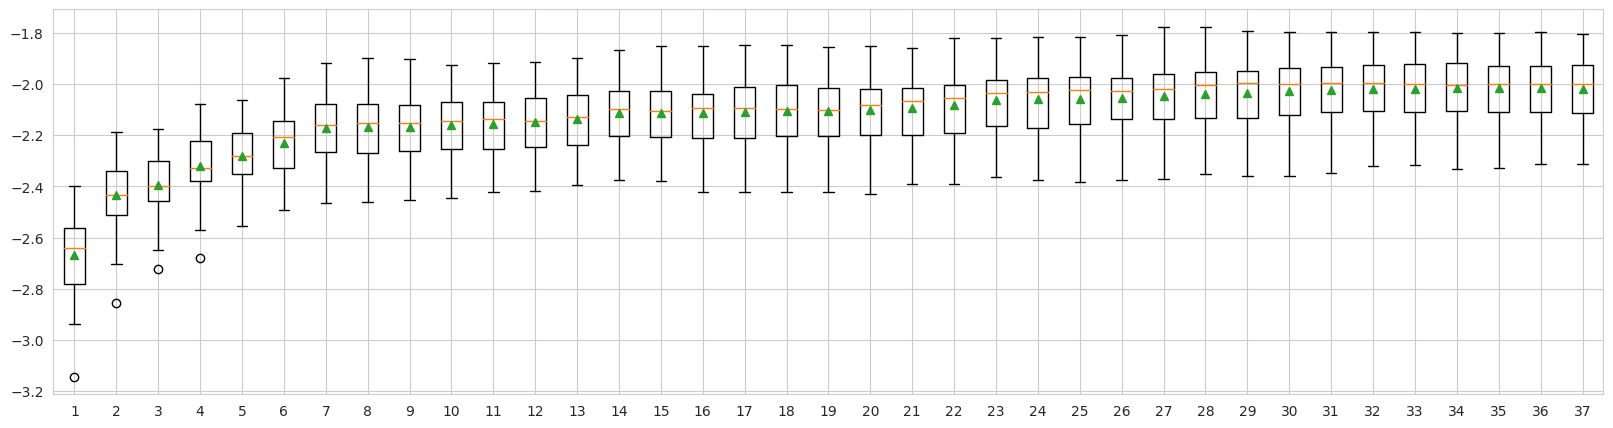

In [ ]:
# plot model performance:
plt.figure(figsize=(20,5))
plt.boxplot(results, labels=num_features, showmeans=True)
plt.show()

### Assessment for Feature Selection Capabilities: MI

#### Linear Regresssion

In [ ]:
# Baseline Model: Direct Utilization of Features
#----------------------------------------------------
# fit the model with X_train --- default settings ---
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
y_predict = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 2.120


In [ ]:
# Baseline Model: MI
#----------------------------------------------------
# fit the model with X_mi --- default settings ---
#----------------------------------------------------
# Select all features to see their relative impact:
mi = SelectKBest(score_func=mutual_info_regression, k=16)
# Fitting:
mi.fit(X_train, y_train)
# transform:
X_train_mi = mi.transform(X_train)
model = LinearRegression()
model.fit(X_train_mi, y_train)
# evaluate the model
X_test_mi = mi.transform(X_test)
y_predict = model.predict(X_test_mi)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 2.425


#### Random Forest

In [ ]:
# Random Forest Regressor
# Hyperparameters:
#You need to check model descriptions for the hyperparameters. 
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier
#-----------------------------------------------------------------
# Number of trees in the forest:
n_estimators = 100
# Number of features to consider when looking for the best split:
max_features='sqrt'
# Maximum depth of the tree:
max_depth = None
# Minimum number of samples required to split an internal node:
min_samples_split = 20
# Minimum number of samples required to be at a leaf node:
min_samples_leaf = 10
# Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. 
max_leaf_nodes = None
# Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree:
bootstrap = False
# Whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.
oob_score = False
# Number of jobs to run in parallel. (-1) means use all.
n_jobs = -1
# Random state
random_state = 2021
# Criterion
criterion= 'absolute_error'
#-----------------------------------------------------------------
# Creating the classifier:
RFR = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, \
                              max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap,oob_score=oob_score, n_jobs=n_jobs, random_state=random_state,criterion=criterion)

In [ ]:
# Baseline Model: Direct Utilization of Features
#----------------------------------------------------
# fit the model with X_train --- default settings ---
RFR.fit(X_train, y_train)
# evaluate the model
y_predict = RFR.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 1.523


In [ ]:
# Baseline Model: MI
#----------------------------------------------------
# fit the model with X_mi --- default settings ---
#----------------------------------------------------
# Select all features to see their relative impact:
mi = SelectKBest(score_func=mutual_info_regression, k=16)
# Fitting:
mi.fit(X_train, y_train)
# transform:
X_train_mi = mi.transform(X_train)
RFR.fit(X_train_mi, y_train)
# evaluate the model
X_test_mi = mi.transform(X_test)
y_predict = RFR.predict(X_test_mi)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 1.584


#### Support Vector Machines

In [ ]:
# Hyperparameters:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#
#__________________________________________________________________________________________
kernel='linear' 
gamma='scale' #Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. When scaled, uses 1 / (n_features * X.var()) as value of gamma.
C=1.0
epsilon=0.1    # Default
shrinking=True # Whether to use the shrinking heuristic. 
tol=0.00001
#Setting the model:
svr_basic = SVR(kernel= kernel, gamma=gamma, tol=tol, C=C, epsilon=epsilon, shrinking=shrinking)

In [ ]:
# Baseline Model: Direct Utilization of Features
#----------------------------------------------------
# fit the model with X_train --- default settings ---
svr_basic.fit(X_train, y_train)
# evaluate the model
y_predict = svr_basic.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 2.079


In [ ]:
# Baseline Model: MI
#----------------------------------------------------
# fit the model with X_mi --- default settings ---
#----------------------------------------------------
# Select all features to see their relative impact:
mi = SelectKBest(score_func=mutual_info_regression, k=16)
# Fitting:
mi.fit(X_train, y_train)
# transform:
X_train_mi = mi.transform(X_train)
svr_basic.fit(X_train_mi, y_train)
# evaluate the model
X_test_mi = mi.transform(X_test)
y_predict = svr_basic.predict(X_test_mi)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 2.428


#### Looping: LR with MI

Lets loop over increasing number of features:






In [ ]:
# Scanning through N number of features:
num_features = [i+1 for i in range(X_train.shape[1])]
# enumerate each number of features
results = list()

In [ ]:
# evaluate a given model using cross-validation
def evaluate_model(model):
  cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
  scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  return scores

In [ ]:
# Model selection
model = LinearRegression()

In [ ]:
# enumerate each number of features
results = list()
for k in num_features:
  # create pipeline
  fs_mi = SelectKBest(score_func=mutual_info_regression, k=k)
  pipeline = Pipeline(steps=[('mi',fs_mi), ('LR', model)])
  # evaluate the model
  scores = evaluate_model(pipeline)
  results.append(scores)
  # summarize the results
  print('%d %.3f (%.3f)' % (k, mean(scores), std(scores)))

1 -2.944 (0.157)
2 -2.941 (0.163)
3 -2.919 (0.164)
4 -2.869 (0.160)
5 -2.805 (0.162)
6 -2.725 (0.156)
7 -2.589 (0.184)
8 -2.545 (0.166)
9 -2.536 (0.166)
10 -2.501 (0.159)
11 -2.502 (0.155)
12 -2.488 (0.161)
13 -2.475 (0.159)
14 -2.446 (0.161)
15 -2.422 (0.173)
16 -2.369 (0.174)
17 -2.298 (0.164)
18 -2.234 (0.148)
19 -2.194 (0.128)
20 -2.165 (0.132)
21 -2.153 (0.135)
22 -2.137 (0.137)
23 -2.130 (0.134)
24 -2.108 (0.140)
25 -2.098 (0.133)
26 -2.086 (0.130)
27 -2.066 (0.123)
28 -2.059 (0.130)
29 -2.056 (0.124)
30 -2.040 (0.127)
31 -2.035 (0.122)
32 -2.029 (0.129)
33 -2.022 (0.126)
34 -2.020 (0.128)
35 -2.018 (0.125)
36 -2.019 (0.124)
37 -2.020 (0.125)


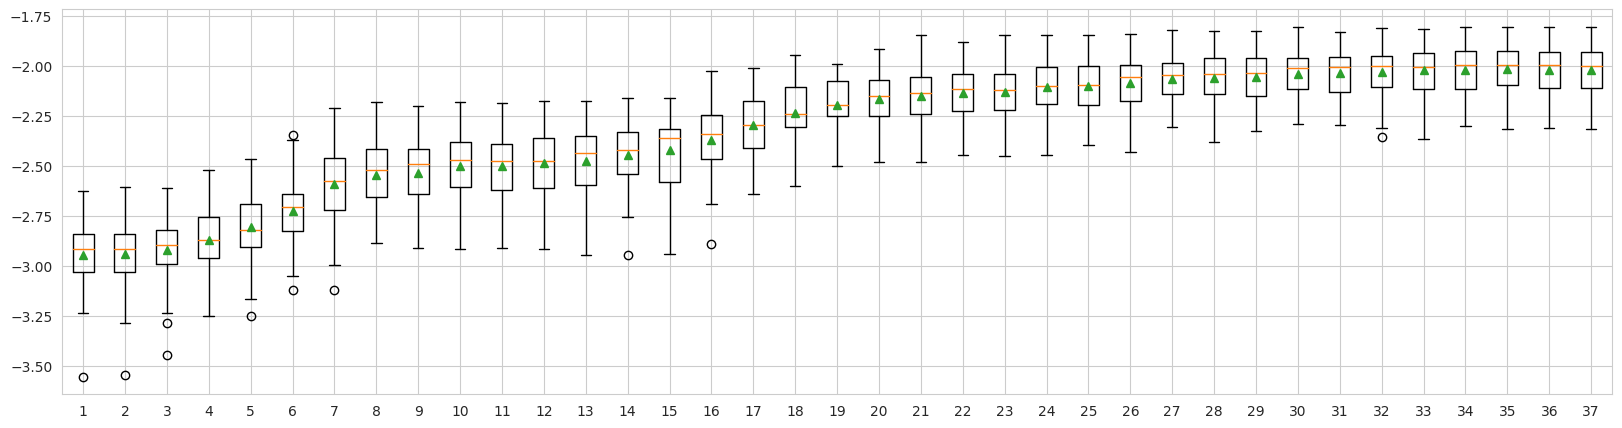

In [ ]:
# plot model performance:
plt.figure(figsize=(20,5))
plt.boxplot(results, labels=num_features, showmeans=True)
plt.show()

## Wrapper: Recursive Feature Elimination

RFE is a wrapper-style feature selection algorithm that also uses filter-based feature selection methods under the hood. 

RFE searches for a subset of features by starting with all features. It removes the features iteratively until N number of features remain. 

This is done by:

1. fitting a ML model for feature set i, 
2. ranking features by importance, discarding the least important features,
3. re-fitting the model. 

The process is repeated until a specified number of features remains. Features are scored either using the provided machine learning model or via deploying a filter.



### RFE Class Scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

The class is configured with two main arguments:

+ estimator: algorithm specified 
+ n_features_to_select: number of features 

One important note here is that fit method of the estimator must provide information about feature importance (e.g. coef_, feature_importances_)

The goal  is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.


**Note**: The hyperparameter `importance_getterstr` is by default=’auto’.    If ‘auto’, uses the feature importance either through a coef_ or feature_importances_ attributes of estimator. But it also accepts a string that specifies an attribute name/path for extracting feature importance (implemented with attrgetter). For example, give regressor_.coef_ in case of TransformedTargetRegressor or named_steps.clf.feature_importances_ in case of class:~sklearn.pipeline.Pipeline with its last step named clf.

#### Determining number of features -- RFR

1. Select a model that can decide feature importance
2. Create a model dict. to loop over with changing feature numbers
3. Apply cv for each feature set
4. Store scores
5. Visualize the scores.

In [ ]:
# Model selection
model = LinearRegression()

In [ ]:
# Models to work with: here you can set the range of investigation. 
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html 
def get_models():
  models = dict()
  for i in range(2, X_train.shape[1]+1):
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)
    models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
  return models

In [ ]:
# Model evaluation via cross-validation:
def evaluate_model(model, X, y):
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=16)
  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  return scores

In [ ]:
#RFE loop:
#---------------------------
# get the models to evaluate
models = get_models()
#---------------------------
# Model evaluation and book keeping:
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X_train, y_train)
  results.append(scores)
  names.append(name)
  print('%s => %.3f (%.3f)' % (name, mean(scores), std(scores)))

2 => -2.530 (0.152)
3 => -2.394 (0.144)
4 => -2.325 (0.139)
5 => -2.265 (0.126)
6 => -2.230 (0.140)
7 => -2.196 (0.129)
8 => -2.164 (0.122)
9 => -2.133 (0.112)
10 => -2.106 (0.107)
11 => -2.100 (0.110)
12 => -2.085 (0.110)
13 => -2.073 (0.111)
14 => -2.068 (0.109)
15 => -2.060 (0.110)
16 => -2.048 (0.111)
17 => -2.043 (0.102)
18 => -2.039 (0.096)
19 => -2.036 (0.094)
20 => -2.036 (0.092)
21 => -2.031 (0.095)
22 => -2.023 (0.092)
23 => -2.024 (0.093)
24 => -2.022 (0.094)
25 => -2.018 (0.097)
26 => -2.012 (0.096)
27 => -2.010 (0.098)
28 => -2.012 (0.096)
29 => -2.014 (0.094)
30 => -2.015 (0.093)
31 => -2.016 (0.093)
32 => -2.016 (0.093)
33 => -2.016 (0.092)
34 => -2.016 (0.092)
35 => -2.016 (0.092)
36 => -2.016 (0.092)
37 => -2.016 (0.093)


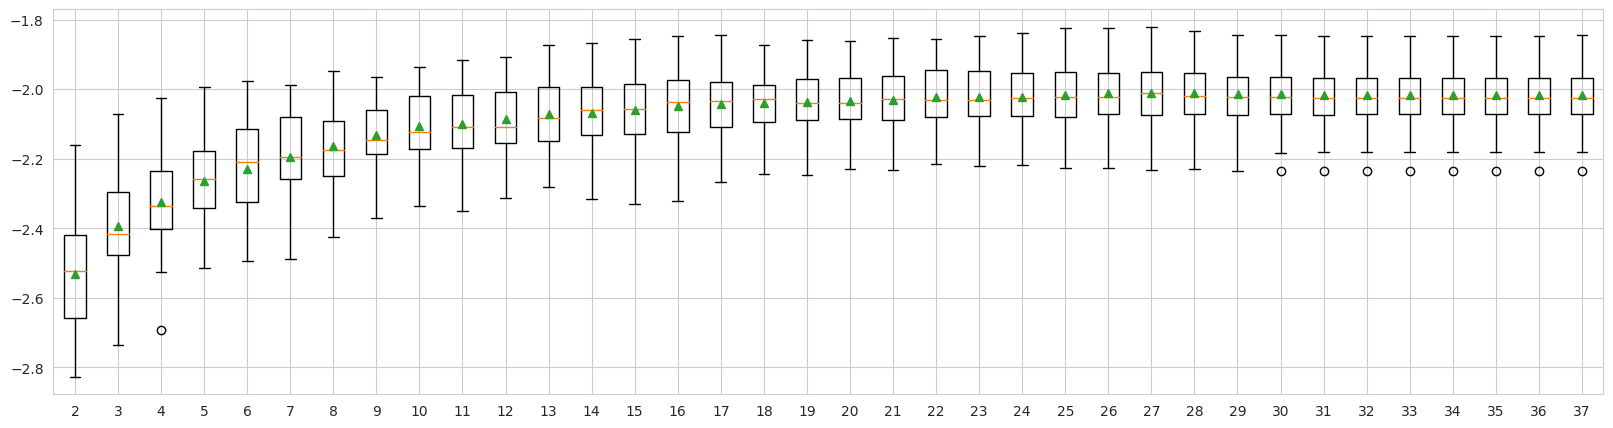

In [ ]:
# plot model performance:
plt.figure(figsize=(20,5))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
# Checking the selected features:
#----------------------------------
# define RFE
rfe_model = RFE(estimator=LinearRegression(), n_features_to_select=5)
# fit RFE
rfe_model.fit(X_train, y_train)
# checking the selected features:
#---------------------------------
#ranking_ndarray of shape (n_features,): The feature ranking, such that ranking_[i] corresponds to the ranking position
#                                        of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.
#--------
#support_ndarray of shape (n_features,): The mask of selected features.
#---------------------------------
for i in range(X_train.shape[1]):
  print('Column: %s, Selected?=%s, Rank: %d' % (X_train.columns[i], rfe_model.support_[i], rfe_model.ranking_[i]))

Column: heathrate_min, Selected?=False, Rank: 30
Column: heathrate_max, Selected?=False, Rank: 26
Column: blood_pressure_min, Selected?=False, Rank: 14
Column: blood_pressure_max, Selected?=False, Rank: 19
Column: mean_art.bloodpressure_min, Selected?=True, Rank: 1
Column: mean_art.bloodpressure_max, Selected?=False, Rank: 13
Column: temp_min, Selected?=False, Rank: 4
Column: temp_max, Selected?=False, Rank: 3
Column: breathing_rate_min, Selected?=False, Rank: 25
Column: breathing_rate_max, Selected?=False, Rank: 28
Column: bicarbonate_min, Selected?=False, Rank: 24
Column: bicarbonate_max, Selected?=False, Rank: 31
Column: ph_min, Selected?=False, Rank: 6
Column: ph_max, Selected?=False, Rank: 7
Column: PF_ratio_min, Selected?=True, Rank: 1
Column: pO2_at_lowest_PF_ratio, Selected?=False, Rank: 2
Column: FIO2_at_lowest_PF_ratio, Selected?=False, Rank: 33
Column: pCO2_at_lowest_PF_ratio, Selected?=False, Rank: 21
Column: urine_output(mL), Selected?=True, Rank: 1
Column: kreatinin_min, 

#### Determining number of features -- Lasso

1. Select a model that can decide feature importance
2. Create a model dict. to loop over with changing feature numbers
3. Apply cv for each feature set
4. Store scores
5. Visualize the scores.

In [ ]:
# Models to work with: here you can set the range of investigation. 
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html 
lasso_reg = Lasso()
def get_models():
  models = dict()
  for i in range(2, X_train.shape[1]+1):
    rfe = RFE(estimator=Lasso(), n_features_to_select=i)
    models[str(i)] = Pipeline(steps=[('s',rfe),('m',lasso_reg)])
  return models

In [ ]:
# Model evaluation via cross-validation:
def evaluate_model(model, X, y):
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=16)
  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  return scores

In [ ]:
# Lasso loop:
#---------------------------
# get the models to evaluate
models = get_models()
#---------------------------
# Model evaluation and book keeping:
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X_train, y_train)
  results.append(scores)
  names.append(name)
  print('%s => %.3f (%.3f)' % (name, mean(scores), std(scores)))

2 => -2.654 (0.159)
3 => -2.635 (0.160)
4 => -2.629 (0.162)
5 => -2.627 (0.161)
6 => -2.627 (0.161)
7 => -2.627 (0.161)
8 => -2.627 (0.161)
9 => -2.627 (0.161)
10 => -2.627 (0.161)
11 => -2.627 (0.161)
12 => -2.627 (0.161)
13 => -2.627 (0.161)
14 => -2.627 (0.161)
15 => -2.627 (0.161)
16 => -2.627 (0.161)
17 => -2.627 (0.161)
18 => -2.627 (0.161)
19 => -2.627 (0.161)
20 => -2.627 (0.161)
21 => -2.627 (0.161)
22 => -2.627 (0.161)
23 => -2.627 (0.161)
24 => -2.627 (0.161)
25 => -2.627 (0.161)
26 => -2.627 (0.161)
27 => -2.627 (0.161)
28 => -2.627 (0.161)
29 => -2.627 (0.161)
30 => -2.627 (0.161)
31 => -2.627 (0.161)
32 => -2.627 (0.161)
33 => -2.627 (0.161)
34 => -2.627 (0.161)
35 => -2.627 (0.161)
36 => -2.627 (0.161)
37 => -2.627 (0.161)


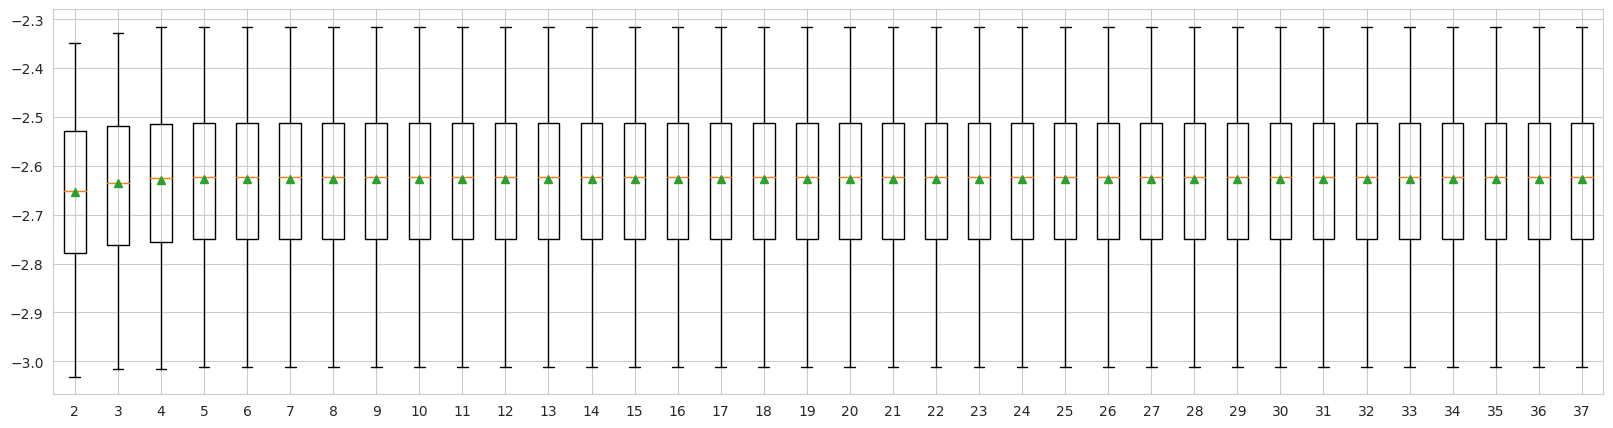

In [ ]:
# plot model performance:
plt.figure(figsize=(20,5))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
# Checking the selected features:
#----------------------------------
# define RFE
rfe_model = RFE(estimator=Lasso(), n_features_to_select=5)
# fit RFE
rfe_model.fit(X_train, y_train)
# checking the selected features:
#---------------------------------
#ranking_ndarray of shape (n_features,): The feature ranking, such that ranking_[i] corresponds to the ranking position
#                                        of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.
#--------
#support_ndarray of shape (n_features,): The mask of selected features.
#---------------------------------
for i in range(X_train.shape[1]):
  print('Column: %s, Selected?=%s, Rank: %d' % (X_train.columns[i], rfe_model.support_[i], rfe_model.ranking_[i]))

Column: heathrate_min, Selected?=False, Rank: 33
Column: heathrate_max, Selected?=False, Rank: 32
Column: blood_pressure_min, Selected?=False, Rank: 31
Column: blood_pressure_max, Selected?=False, Rank: 30
Column: mean_art.bloodpressure_min, Selected?=False, Rank: 2
Column: mean_art.bloodpressure_max, Selected?=False, Rank: 15
Column: temp_min, Selected?=False, Rank: 14
Column: temp_max, Selected?=False, Rank: 13
Column: breathing_rate_min, Selected?=False, Rank: 12
Column: breathing_rate_max, Selected?=False, Rank: 11
Column: bicarbonate_min, Selected?=False, Rank: 10
Column: bicarbonate_max, Selected?=False, Rank: 9
Column: ph_min, Selected?=True, Rank: 1
Column: ph_max, Selected?=False, Rank: 16
Column: PF_ratio_min, Selected?=True, Rank: 1
Column: pO2_at_lowest_PF_ratio, Selected?=False, Rank: 20
Column: FIO2_at_lowest_PF_ratio, Selected?=True, Rank: 1
Column: pCO2_at_lowest_PF_ratio, Selected?=False, Rank: 24
Column: urine_output(mL), Selected?=False, Rank: 26
Column: kreatinin_mi

#### What if I do not have a feeling about which model to choose?

You may want to try a few alternative approaches to decide the feature sub-set, rather than relying on an assumption. to illustrate, we will use `LinearRegression, Lasso, ElasticNet `as alternatives.

In [ ]:
# Creating alternative model scenerios:
def get_models(n_features_to_select=16):
  models = dict()
  # Model 1: LinearRegression
  rfe = RFE(estimator=LinearRegression(), n_features_to_select=n_features_to_select)
  model = LinearRegression()
  models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
  # Model 2: Lasso
  rfe = RFE(estimator=Lasso(), n_features_to_select=n_features_to_select)
  model = Lasso()
  models['lasso'] = Pipeline(steps=[('s',rfe),('m',model)])
  # Model 3: ElasticNet
  rfe = RFE(estimator=ElasticNet(), n_features_to_select=n_features_to_select)
  model = ElasticNet()
  models['elastic'] = Pipeline(steps=[('s',rfe),('m',model)])
  return models

In [ ]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=12)
  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  return scores

In [ ]:
# Evaluation
n_features_to_select = 16
models = get_models(n_features_to_select)
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X_train, y_train)
  results.append(scores)
  names.append(name)
  print('%s => %.3f (%.3f)' % (name, mean(scores), std(scores)))

lr => -2.044 (0.109)
lasso => -2.625 (0.118)
elastic => -2.365 (0.104)


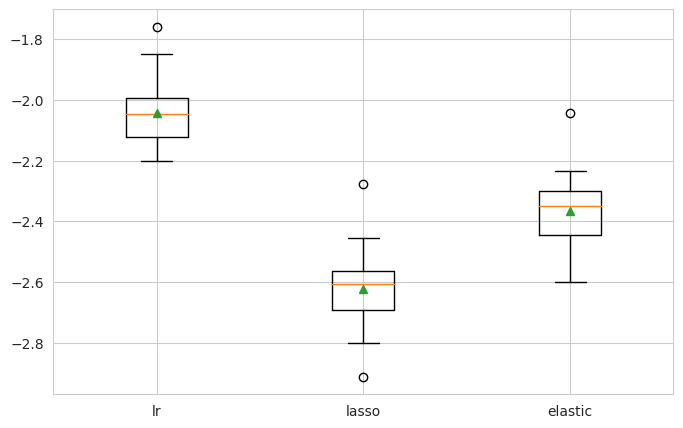

In [ ]:
# Visualization of the results
plt.figure(figsize=(8,5))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
# Alternative option: FRECV
# Recursive feature elimination with cross-validation to select features based on mean score. 
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV 

## Wrapper: Genetic Algorithms

In [ ]:
!pip install deap
!pip install tqdm
!pip install sklearn-genetic-opt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 8.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sklearn_genetic as GA

In [ ]:
estimator = LinearRegression()
#-------------------------------------------------------------------------------------------------------------------------------
# class sklearn_genetic.GAFeatureSelectionCV(estimator, cv=3, scoring=None, population_size=50, generations=80, 
#                                            crossover_probability=0.2, mutation_probability=0.8, tournament_size=3, 
#                                            elitism=True, max_features=None, verbose=True, keep_top_k=1, criteria='max', 
#                                            algorithm='eaMuPlusLambda', refit=True, n_jobs=1, pre_dispatch='2*n_jobs', 
#                                            error_score=nan, return_train_score=False, log_config=None)
#-------------------------------------------------------------------------------------------------------------------------------
# Implementation
#-------------------------------------------------------------------------------------------------------------------------------
model = GA.GAFeatureSelectionCV(estimator, cv=5, verbose=1, scoring="neg_mean_absolute_error", max_features=16, 
                                population_size=165, crossover_probability=0.5,
                                mutation_probability=0.05, generations=100,
                                n_jobs=-1)

In [ ]:
model = model.fit(X_train, y_train)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	165   	-43637.7	49592.2    	-2.17823   	-100000    
1  	181   	-7880.96	26940.1    	-2.17524   	-100000    
2  	174   	-608.332	7761.19    	-2.16906   	-100000    
3  	179   	-2.22801	0.0532741  	-2.13872   	-2.42822   
4  	177   	-2.19048	0.0277507  	-2.13872   	-2.30237   
5  	173   	-608.217	7761.19    	-2.12288   	-100000    
6  	184   	-2.15508	0.0194083  	-2.10367   	-2.21068   
7  	197   	-2.14113	0.016644   	-2.09721   	-2.18819   
8  	172   	-2.12955	0.0143687  	-2.09585   	-2.17154   
9  	183   	-2.11858	0.0130474  	-2.09024   	-2.16205   
10 	188   	-2.10565	0.0107347  	-2.07515   	-2.13208   
11 	185   	-2.0972 	0.00904157 	-2.07336   	-2.12584   
12 	173   	-2.08875	0.00778121 	-2.05622   	-2.12092   
13 	177   	-2.08082	0.00818676 	-2.05622   	-2.09376   
14 	188   	-2.07479	0.00901084 	-2.04822   	-2.09526   
15 	169   	-608.117	7761.2     	-2.04822   	-100000    
16 	185   	-2.0631 	0.00772484 	-2.04822   	-2.0

In [ ]:
print('Features:', X_train.columns[model.support_])

Features: Index(['mean_art.bloodpressure_min', 'mean_art.bloodpressure_max', 'temp_min',
       'temp_max', 'ph_min', 'ph_max', 'PF_ratio_min',
       'pO2_at_lowest_PF_ratio', 'urine_output(mL)', 'kreatinin_min',
       'leukocytes_min', 'thrombocit_min', 'pip_dosage(mg)',
       'sample_conc(mg/L)', 'Height', 'Weight'],
      dtype='object')


In [ ]:
# Features selected are filtered from normalized dataframe:
cols_idxs = X_train.columns[model.support_].tolist()
GA_selected = X_train[cols_idxs]
GA_selected

,mean_art.bloodpressure_min,mean_art.bloodpressure_max,temp_min,temp_max,ph_min,ph_max,PF_ratio_min,pO2_at_lowest_PF_ratio,urine_output(mL),kreatinin_min,leukocytes_min,thrombocit_min,pip_dosage(mg),sample_conc(mg/L),Height,Weight
880,-0.353189,0.854177,-0.437942,-0.666254,1.250663,0.861936,0.402820,0.183409,-0.443458,-0.743799,-0.556289,0.090923,-1.914611,-0.261883,-1.081567,-0.716940
305,-0.353189,-0.413677,-0.701061,-0.789510,-3.084124,-1.247072,-0.725152,0.058198,-1.026025,1.415218,-0.288703,-0.080873,-2.071013,1.719973,0.064312,-0.623321
1756,-0.612757,-0.477070,0.877651,0.196534,1.274880,1.018805,-0.090006,-0.821143,0.224961,-0.765004,0.362933,1.827295,0.925627,-0.016844,-0.394040,-1.887173
559,0.165947,0.347036,0.746092,0.443045,-1.752206,-2.467160,0.086423,0.700365,-1.387830,1.207546,0.598631,-0.933720,1.694099,-0.191798,1.439366,0.546912
2198,-0.309928,-0.825730,0.614533,0.196534,0.766329,0.095024,1.862480,4.138832,0.874983,-0.764785,0.099506,2.410176,1.167391,-0.819969,0.751839,-0.155228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,-0.266666,-0.603856,-1.095739,-1.282532,-1.146789,-2.641458,-1.544961,0.272254,-1.167681,1.262197,0.293610,-0.909178,0.577410,2.686890,-0.394040,0.546912
2345,-1.045370,-1.554747,0.351414,-0.173233,-2.418165,-1.682818,-1.477918,-0.627082,-1.182398,-0.739427,4.383664,-1.326398,-1.138154,0.425991,-0.394040,0.780959
1111,0.079424,-1.364568,0.351414,-0.666254,-0.420288,-0.201283,-0.219388,-0.341698,0.605163,-0.071272,0.709548,-0.301755,-0.879596,-0.082776,-1.539919,-1.231842
2116,-0.482973,-0.625092,0.614533,0.443045,0.487837,1.193103,0.180578,-0.570005,0.071654,-0.764348,-0.120941,0.090923,0.649102,-0.797646,0.751839,-0.716940


In [ ]:
# evaluate the model
y_predict = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 2.139


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GAFeatureSelectionCV was fitted without feature names
  warnings.warn(
